## Data Understanding & preparing

#### Import Libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

#### Reading the dataset

In [105]:
df = pd.read_csv("social_anxiety_dataset.csv")
df.head(10)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Target,is_Anxious,Therapy History
0,59.0,Other,Teacher,7.0,2.4,40.0,5,Yes,No,4,...,5,No,No,0,Yes,1.0,2.0,0,0,Group Therapy
1,46.0,Female,Student,5.1,5.4,156.0,11,NaN,No,3,...,4,Yes,No,2,No,1.0,4.0,0,0,NaN
2,40.0,Other,Lawyer,5.1,1.9,570.0,14,Yes,Yes,9,...,3,No,No,6,Yes,4.0,9.0,1,1,NaN
3,40.0,Male,Nurse,7.6,0.9,129.0,0,No,No,9,...,2,No,NaN,2,No,2.0,6.0,0,0,NaN
4,26.0,Male,Other,6.7,3.0,64.0,13,No,No,15,...,4,No,Yes,0,Yes,4.0,3.0,0,0,NaN
5,53.0,Male,Student,8.7,4.8,324.0,0,Yes,Yes,1,...,5,Yes,NaN,1,Yes,8.0,1.0,0,0,NaN
6,32.0,Male,Nurse,5.9,2.0,318.0,12,No,Yes,7,...,4,No,Yes,4,No,10.0,5.0,0,0,NaN
7,36.0,Male,Musician,6.4,4.0,230.0,4,NaN,Yes,1,...,2,Yes,No,3,Yes,7.0,1.0,0,0,NaN
8,56.0,Other,Engineer,3.2,4.5,436.0,1,No,Yes,2,...,3,No,Yes,2,No,3.0,3.0,0,0,NaN
9,27.0,Other,Artist,-10.0,2.4,NaN,6,Yes,No,7,...,1,Yes,Yes,1,No,7.0,3.0,0,0,NaN


## Dataset information

### Column information 

**Age**:(numerical, continuous)The person's age (in years).

**Gender**:(Categorical, nominal) The person's gender (male, female, other).

**Occupation**:(Categorical, nominal) The person's job or working status(Teacher, Student, Lawyer, Nurse, Other, Musician,
                                               Engineer, Artist, Chef, Scientist, Athlete, Freelancer,Doctor)
                                               
**Sleep Hours**:(numerical, continuous) Number of hours of sleep per day.

**Physical Activity (hrs/week)**:(numerical, continuous) Amount of physical activity per week (in hours).

**Caffeine Intake (mg/day)**:(numerical, continuous) Daily caffeine intake (in milligrams).

**Alcohol Consumption (drinks/week)**:(numerical, continuous) Number of alcoholic drinks consumed per week.

**Smoking**:(Categorical, nominal) Smoking status (yes/no).

**Family History of Anxiety**:(Categorical, nominal) Family history of anxiety (whether anxiety runs in the person's family).

**Stress Level (1-10)**:(Categorical, ordinal) Individual stress level on a scale of 1 to 10.

**Heart Rate (bpm)**:(numerical, continuous) Heart rate per minute (beats per minute).

**Breathing Rate (breaths/min)**:(numerical, continuous) Number of breaths per minute.

**Sweating Level (1-5)**:(Categorical, ordinal) Sweating intensity on a scale of 1 to 5.

**Dizziness**:(Categorical, nominal) Presence or severity of dizziness (yes/no).

**Medication**:(Categorical, nominal) Use of anxiety-related medications (yes/no).

**Therapy Sessions (per month)**:(numerical, discrete) Number of therapy or counseling sessions per month.

**Recent Major Life Event**:(Categorical, nominal) A recent major event (yes/no).

**Diet Quality (1-10)**:(Categorical, ordinal) The quality of a person's diet on a scale of 1 to 10.

**Anxiety Level (1-10)**:(Categorical, ordinal) The person's anxiety level on a scale of 1 to 10.

**Target**:(Categorical) Target column for modeling (0 or 1).

**is_Anxious**:(Categorical) A binary variable (0 or 1) that indicates whether a person is anxious or not.

**Therapy History**:(Categorical, nominal) History of past therapy or counseling sessions('Group Therapy', 'Psychodynamic Therapy',
                                                                'Cognitive Behavioral Therapy (CBT)', 'No previous history')


In [106]:
shape = df.shape
print(f"The number of rows is {shape[0]}, and the number of columns is {shape[1]}.")

The number of rows is 2030, and the number of columns is 22.


In [107]:
print(f"Number of duplicate rows: {df.duplicated().sum()}.")

Number of duplicate rows: 0.


In [108]:
target = "is_Anxious"
print(f"The target variable of the dataset is the {target}.")

The target variable of the dataset is the is_Anxious.


#### dataset summary

In [109]:
information = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1968 non-null   float64
 1   Gender                             1911 non-null   object 
 2   Occupation                         2030 non-null   object 
 3   Sleep Hours                        1994 non-null   float64
 4   Physical Activity (hrs/week)       2030 non-null   float64
 5   Caffeine Intake (mg/day)           1936 non-null   float64
 6   Alcohol Consumption (drinks/week)  2030 non-null   int64  
 7   Smoking                            1924 non-null   object 
 8   Family History of Anxiety          2030 non-null   object 
 9   Stress Level (1-10)                2030 non-null   int64  
 10  Heart Rate (bpm)                   2030 non-null   int64  
 11  Breathing Rate (breaths/min)       2030 non-null   int64

In [110]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Target,is_Anxious
count,1968.000000,1994.000000,2030.000000,1936.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,1952.000000,2030.000000,2030.000000,2030.000000
mean,39.921748,6.424624,2.800246,306.275826,9.490148,6.028571,93.066502,20.955665,3.095567,2.359113,5.234119,3.922660,0.103448,0.103448
std,13.243754,2.161544,2.233899,208.012717,6.028653,3.137269,23.313430,5.182524,1.392697,2.148642,2.884946,2.139176,0.304619,0.304619
min,18.000000,-10.000000,-10.000000,0.000000,-10.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,29.000000,5.800000,1.400000,177.750000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,6.700000,2.800000,277.500000,10.000000,6.000000,93.000000,21.000000,3.000000,2.000000,5.000000,4.000000,0.000000,0.000000
75%,51.000000,7.500000,4.200000,391.000000,15.000000,9.000000,107.000000,26.000000,4.000000,3.000000,8.000000,5.000000,0.000000,0.000000
max,64.000000,11.000000,9.200000,1500.000000,19.000000,15.000000,220.000000,29.000000,5.000000,10.000000,10.000000,10.000000,1.000000,1.000000


## columns summary

#### Numeric data

In [111]:
# Creating a DataFrame for Numeric Data
def numerical_summary(dataframe , columns):
    
    # Calculate the values of each column and put them in a list Convert to a dataframe
    numerical_list = []
    
    for col in columns:
        numerical_list.append({
            'Count' : dataframe[col].count(),                 # Number of rows without values NAN
            'Unique' : len(dataframe[col].dropna().unique()), # Number of unique numbers
            'Min' : min(dataframe[col]),   # Minimum number of numbers
            'Max' : max(dataframe[col]),   # Maximum number of numbers
            'Range' : np.subtract(max(dataframe[col]) , min(dataframe[col])),  # Range of numbers
            'Mean' : dataframe[col].mean(),                   # Mean of numbers
            'Mode' : dataframe[col].value_counts().index[0],  # Mode of numbers
            'Q1' : dataframe[col].quantile(0.25),  # Quartile first 
            'Q2' : dataframe[col].quantile(0.5),   # Quartile second 
            'Q3' : dataframe[col].quantile(0.75),  # Quartile third
            'IQR' : np.subtract(dataframe[col].quantile(0.75), dataframe[col].quantile(0.25)), # Q3 - Q1
            'Std' : dataframe[col].std(),      # Standard deviation of numbers
            'Variance': dataframe[col].var(),  # Variance of numbers
            'Skewness' : stats.skew(dataframe[col]),     # Compute the Skewness 
            'Kurtosis' : stats.kurtosis(dataframe[col]), # Compute the kurtosis
            'CV' : (dataframe[col].std() / dataframe[col].mean()) * 100  # Compute the Coefficient of Variation
        })

    # Convert to a dataframe
    numerical_df = pd.DataFrame(numerical_list, index=columns)

    return(numerical_df)   

In [112]:
# Specifying numeric columns
numerical_col = ['Age',
                 'Sleep Hours',
                 'Physical Activity (hrs/week)',
                 'Caffeine Intake (mg/day)',
                 'Alcohol Consumption (drinks/week)',
                 'Heart Rate (bpm)',
                 'Breathing Rate (breaths/min)',
                 'Therapy Sessions (per month)']

print(f"{len(numerical_col)} Numeric Columns:")
numerical_col

8 Numeric Columns:


['Age',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Heart Rate (bpm)',
 'Breathing Rate (breaths/min)',
 'Therapy Sessions (per month)']

In [113]:
numerical_summary(df , numerical_col)


,Count,Unique,Min,Max,Range,Mean,Mode,Q1,Q2,Q3,IQR,Std,Variance,Skewness,Kurtosis,CV
Age,1968,47,18.0,64.0,46.0,39.921748,45.0,29.00,40.0,51.0,22.00,13.243754,175.397026,NaN,NaN,33.174284
Sleep Hours,1994,76,-10.0,11.0,21.0,6.424624,6.7,5.80,6.7,7.5,1.70,2.161544,4.672273,NaN,NaN,33.644681
Physical Activity (hrs/week),2030,89,-10.0,9.2,19.2,2.800246,2.8,1.40,2.8,4.2,2.80,2.233899,4.990306,-1.438129,7.727575,79.775096
Caffeine Intake (mg/day),1936,544,0.0,1500.0,1500.0,306.275826,1500.0,177.75,277.5,391.0,213.25,208.012717,43269.290289,NaN,NaN,67.916792
Alcohol Consumption (drinks/week),2030,23,-10.0,19.0,29.0,9.490148,9.0,5.00,10.0,15.0,10.00,6.028653,36.344654,-0.258778,-0.561056,63.525383
Heart Rate (bpm),2030,61,60.0,220.0,160.0,93.066502,110.0,76.00,93.0,107.0,31.00,23.313430,543.516029,2.195311,10.607367,25.050292
Breathing Rate (breaths/min),2030,18,12.0,29.0,17.0,20.955665,26.0,17.00,21.0,26.0,9.00,5.182524,26.858556,-0.129388,-1.177937,24.730898
Therapy Sessions (per month),2030,11,0.0,10.0,10.0,2.359113,1.0,1.00,2.0,3.0,2.00,2.148642,4.616662,1.052257,0.661876,91.078364


#### Categorical data

In [114]:
# Creating a DataFrame for Category Data
def category_summary(dataframe , columns):

    # Calculate the values of each column and put them in a list Convert to a dataframe
    category_list = []
    
    for col in columns:
        category_list.append({
            'Count' : dataframe[col].count(),  # Number of categories without NAN
            'Unique' : len(dataframe[col].dropna().unique()),  # Number of unique categories
            'Mode': dataframe[col].value_counts().index[0]     # Mode of each column
        })

    # Convert to a dataframe
    category_df = pd.DataFrame(category_list, index=columns)

    return(category_df)    

In [115]:
# Specifying Category columns
category_col = ['Gender',
                'Occupation',
                'Smoking',
                'Family History of Anxiety',
                'Stress Level (1-10)',
                'Sweating Level (1-5)',
                'Dizziness','Medication',
                'Recent Major Life Event',
                'Diet Quality (1-10)',
                'Anxiety Level (1-10)',
                'is_Anxious']
print(f"{len(category_col)} Category Columns:")
category_col

12 Category Columns:


['Gender',
 'Occupation',
 'Smoking',
 'Family History of Anxiety',
 'Stress Level (1-10)',
 'Sweating Level (1-5)',
 'Dizziness',
 'Medication',
 'Recent Major Life Event',
 'Diet Quality (1-10)',
 'Anxiety Level (1-10)',
 'is_Anxious']

In [116]:
category_summary(df , category_col)

,Count,Unique,Mode
Gender,1911,3,Female
Occupation,2030,13,Student
Smoking,1924,2,Yes
Family History of Anxiety,2030,2,Yes
Stress Level (1-10),2030,11,10
Sweating Level (1-5),2030,5,4
Dizziness,2030,2,Yes
Medication,1921,2,Yes
Recent Major Life Event,2030,2,Yes
Diet Quality (1-10),1952,10,3.0


In [117]:
null_value = df.isnull().sum()
print("Columns that have the NAN value:")
null_value[null_value > 0]

Columns that have the NAN value:


Age                           62
Gender                       119
Sleep Hours                   36
Caffeine Intake (mg/day)      94
Smoking                      106
Medication                   109
Diet Quality (1-10)           78
Therapy History             1827
dtype: int64

In [118]:
for column in category_col :
    print(f"{column}: {df[column].unique()}\n")

Gender: ['Other' 'Female' 'Male' nan]

Occupation: ['Teacher' 'Student' 'Lawyer' 'Nurse' 'Other' 'Musician' 'Engineer'
 'Artist' 'Chef' 'Scientist' 'Athlete' 'Freelancer' 'Doctor']

Smoking: ['Yes' nan 'No']

Family History of Anxiety: ['No' 'Yes']

Stress Level (1-10): [ 4  3  9 15  1  7  2 10  8  6  5]

Sweating Level (1-5): [5 4 3 2 1]

Dizziness: ['No' 'Yes']

Medication: ['No' nan 'Yes']

Recent Major Life Event: ['Yes' 'No']

Diet Quality (1-10): [ 1.  4.  2.  8. 10.  7.  3.  9.  6. nan  5.]

Anxiety Level (1-10): [ 2.  4.  9.  6.  3.  1.  5.  8.  7. 10.]

is_Anxious: [0 1]



## preparing

#### feature selection
Based on the statistics, some columns have identical values and some columns have many null values that can be removed:
1. **Therapy History**: Due to having many null values.
2. **Target**: With the column is 'is_Anxious' and the 'Anxiety Level (1-10)' has the same data.

## Visualization

In [119]:
def numerical_chart(data, column, target):

    info = data.groupby([column, target], observed=False).size().unstack()
    
    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(20,10))

    #-------- Row 1 ---------
    # General title
    fig.suptitle(f"{column} Column", fontsize=16, fontweight="bold")
    
    # Histogram with KDE
    sns.histplot(data[column], kde=True, ax=axes[0,0])
    axes[0,0].set_title("Histogram with KDE")
    
    # Boxplot
    sns.boxplot(x=data[column], ax=axes[0,1])
    axes[0,1].set_title("Boxplot")

    # QQ Plot with shapiro test
    _, p_value = stats.shapiro(data[column])
    (osm, osr), (slope, intercept, r) = stats.probplot(data[column], dist="norm")
    axes[0,2].scatter(osm, osr)
    axes[0,2].set_title(f"QQ Plot\n P Value(Shapiro test) = {p_value:.5f}")

    #-------- Row 2 ----------
    info.plot(kind="bar",ax=axes[1,0])
    axes[1,0].set_title(f"Stacked Histogram of {column}")
    
   
    # kdeplot chart to examine the impact of the target variable
    sns.kdeplot(data=data, x=column, hue=target, fill=True, ax=axes[1,1])
    axes[1,1].set_title(f"KDE of {column} by {target}")

    # Normalized Stacked Bar Chart
    normalized = info.div(info.sum(axis=1), axis=0)  # Normalization (each column sum = 1)
    normalized.plot(kind="bar", stacked=True,ax=axes[1,2])
    axes[1,2].set_title(f"Per-bin Proportion(100% Stacked) of {column}")
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()

In [120]:
def categories_table(data, column, target):
    # Required data
    freq = data[column].value_counts().to_frame()
    freq["Percentage"] = (freq / freq.sum()) * 100
    info = data.groupby([column, target], observed=False).size().unstack()
    info_percentage = info.div(info.sum(axis=1), axis=0) * 100 

    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # General title
    fig.suptitle(f"{column} Column", fontsize=16, fontweight="bold")

    # table 1
    sns.heatmap(freq, annot=True, fmt='.2f', cmap='Blues',ax=axes[0])
    axes[0].set_title("Category Frequency")

    # table 2
    sns.heatmap(info, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[0].set_title("Count by Category and Target")

    # table 3
    sns.heatmap(info_percentage, annot=True, fmt='.2f', cmap='Blues', ax=axes[2])
    axes[0].set_title("Percentage by Category and Target")
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()    

In [121]:
def categories_chart(data, column, target):
    # Required data
    freq = data[column].value_counts()
    info = data.groupby([column, target], observed=False).size().unstack()
    
    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # General title
    fig.suptitle(f"{column} Column", fontsize=16, fontweight="bold")
    
    # Plot 1 - requency Bar Chart
    axes[0].bar(freq.index, freq.values)
    axes[0].set_title("Frequency Bar Chart")
    
    # Plot 2 - Grouped Bar Chart
    info.plot(kind="bar", ax=axes[1])
    axes[1].set_title("Grouped Bar Chart")
    
    # Plot 3 - Normalized Stacked Bar Chart
    normalized = info.div(info.sum(axis=1), axis=0)  # Normalization (each column sum = 1)
    normalized.plot(kind="bar", stacked=True, ax=axes[2])
    axes[2].set_title("Normalized Stacked Bar Chart")

    #axes[2].pie(freq.values, labels=freq.index)
    #axes[2].set_title("Pie Chart")
    
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()

In [122]:
def show_category_data(data, column, target):
    """
    Row 1: Show Tables
    Row 2: Show Charts
    """
    categories_table(data, column, target)
    categories_chart(data, column, target)

In [123]:
def show_numeric_categorical_data(data, column, target):
    """
    Analyze a numeric categorical column (ordinal/discrete) vs the target column.
    Similar to show_category_data but for numeric categorical data.
    """
    categories_table(data, column, target)
    categories_chart(data, column, target)

## ‌Binning

In [124]:
def binning(data, column, bins, labels):
    
    data[column] = pd.cut(data[column],
                          bins=bins, 
                          labels=labels,
                          include_lowest=[True])

    #return data

## Reclassifying

In [125]:
def reclassifying(data, column, mapping):
    # mapping : Dictionary
    data[column] = data[column].replace(mapping)

    #return data

## Statistical tests

In [126]:
def statistical_tests(data, column1, column2):

    group0 = data[column1]
    group1 = data[column2]

    def shapiro(group0, group1):
        _ , p_value1 = stats.shapiro(group0)
        _ , p_value2 = stats.shapiro(group1)
        return (p_value1, p_value2)

    def normalization(group0, group1):
        pt = PowerTransformer(method='yeo-johnson')
        yj1 = pt.fit_transform(group0.values.reshape(-1,1)).flatten()
        yj2 = pt.fit_transform(group1.values.reshape(-1,1)).flatten()
        return yj1, yj2

    p_value1, p_value2 = shapiro(group0, group1)

    if p_value1 > 0.05 and p_value2 > 0.05:
        _ , p_value_test = stats.ttest_ind(group0, group1)
        print(f"Using T Test:")
        print(f"P Value:{p_value_test}\n The data is normally distributed.")
        
    else:
        print("The data distribution is not normal.\n normalize the data...")
        new_g1, new_g2 = normalization(group0, group1)
        p_v1, p_v2 = shapiro(new_g1, new_g2)
        
        if p_v1 > 0.05 and p_v2 > 0.05:
            _ , p_value_test = stats.ttest_ind(new_g1, new_g2)
            print(f"Using T Test:")
            print(f"P Value:{p_value_test}\n The data is normal now.")
            
        else:
            _ , p_value_test = stats.mannwhitneyu(group0, group1, alternative="two-sided")
            print(f"Using Mann–Whitney U test:")
            print(f"P Value:{p_value_test}\n The data is not normalized.")

    #return (p_value_test)

In [127]:
# To test the independence between two categorical variables
def chi2 (data, column1 , column2):
    table = pd.crosstab(data[column1], data[column2])
    result_gen = stats.chi2_contingency(table)
    
    print(f"{column1}\n P Value: {result_gen.pvalue:.4f}")
    if result_gen.pvalue > 0.05 :
        return 'fail to reject the H0'
    elif result_gen.pvalue < 0.05 :
        return 'reject the H0'

In [128]:
# To test the independence between a numeric categorical (ordinal) variable and a categorical target
def ordinal_chi2(data, column, target):
    """
    Tests independence between an ordinal/numeric categorical column and a target variable.
    Uses chi-square test similar to chi2 function but designed for ordinal data.
    """
    table = pd.crosstab(data[column], data[target])
    result = stats.chi2_contingency(table)
    
    print(f"{column} vs {target}")
    print(f"Chi-square statistic: {result[0]:.4f}")
    print(f"P Value: {result[1]:.4f}")
    
    if result[1] > 0.05:
        print("Result: Fail to reject the null hypothesis (H0)")
        print("→ No significant relationship between variables\n")
        return 'fail to reject the H0'
    else:
        print("Result: Reject the null hypothesis (H0)")
        print("→ Significant relationship exists between variables\n")
        return 'reject the H0'

## Data Cleaning

#### Missing value and outlier

In [129]:
def replace_outliners(column , method):
    #replaces the outliners with one of the following methods (iqr - z score)
    
    column = column.astype(float).copy()
    
    def iqr (column) :
        # caculates the upper,lower with iqr 
        
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1 
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR 
        return upper, lower 


    def z_score (column):
        # caculates the upper,lower with z score 
        
        upper = column.mean() + (3 * column.std())
        lower = column.mean() - (3 * column.std())
        return upper, lower

    if method == 'iqr' :
        upper ,lower = iqr(column)

    elif method =='z_score' :
        upper ,lower = z_score(column)

    column[column > upper] = upper
    column[column < lower] = lower
    return column

In [130]:
def fillna(data, numeric_cols, qual_cols):
    
    for col_num in numeric_cols:
        data.fillna({col_num : data[col_num].median()}, inplace = True)

    for col_qual in qual_cols:
        data.fillna({col_qual : data[col_qual].mode()[0]}, inplace = True)

    return data

In [131]:
clip_list = ['Sleep Hours', 'Physical Activity (hrs/week)',
             'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)']

for col in clip_list:
    df[col] = df[col].clip(lower = 0)

#df['Stress Level (1-10)'] = df['Stress Level (1-10)'].clip(lower = 1 , upper = 10)

In [132]:
numeric_vars = ['Age', 'Sleep Hours', 'Caffeine Intake (mg/day)', 'Diet Quality (1-10)']
qual_vars = ['Occupation', 'Gender', 'Smoking', 'Medication']

df = fillna(df, numeric_vars, qual_vars)

In [133]:
replace_list = ['Age', 'Sleep Hours','Caffeine Intake (mg/day)', 
                'Alcohol Consumption (drinks/week)','Heart Rate (bpm)',
                'Physical Activity (hrs/week)', 'Therapy Sessions (per month)']

for col in replace_list:
    df[col] = replace_outliners(df[col],'iqr')

In [134]:
#df.info()

## Exploratory Data Analysis (EDA)

**Numeric columns**: Age, Sleep Hours, Physical Activity (hrs/week), Caffeine Intake (mg/day), Alcohol Consumption (drinks/week),
                     Heart Rate (bpm), Breathing Rate (breaths/min), Therapy Sessions (per month)

**Category columns**: Gender, Occupation, Smoking, Family History of Anxiety, Stress Level (1-10), Sweating Level (1-5), Dizziness,
                     Medication, Recent Major Life Event, Diet Quality (1-10), Anxiety Level (1-10), is_Anxious

### Numeric univariate

#### Age

c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

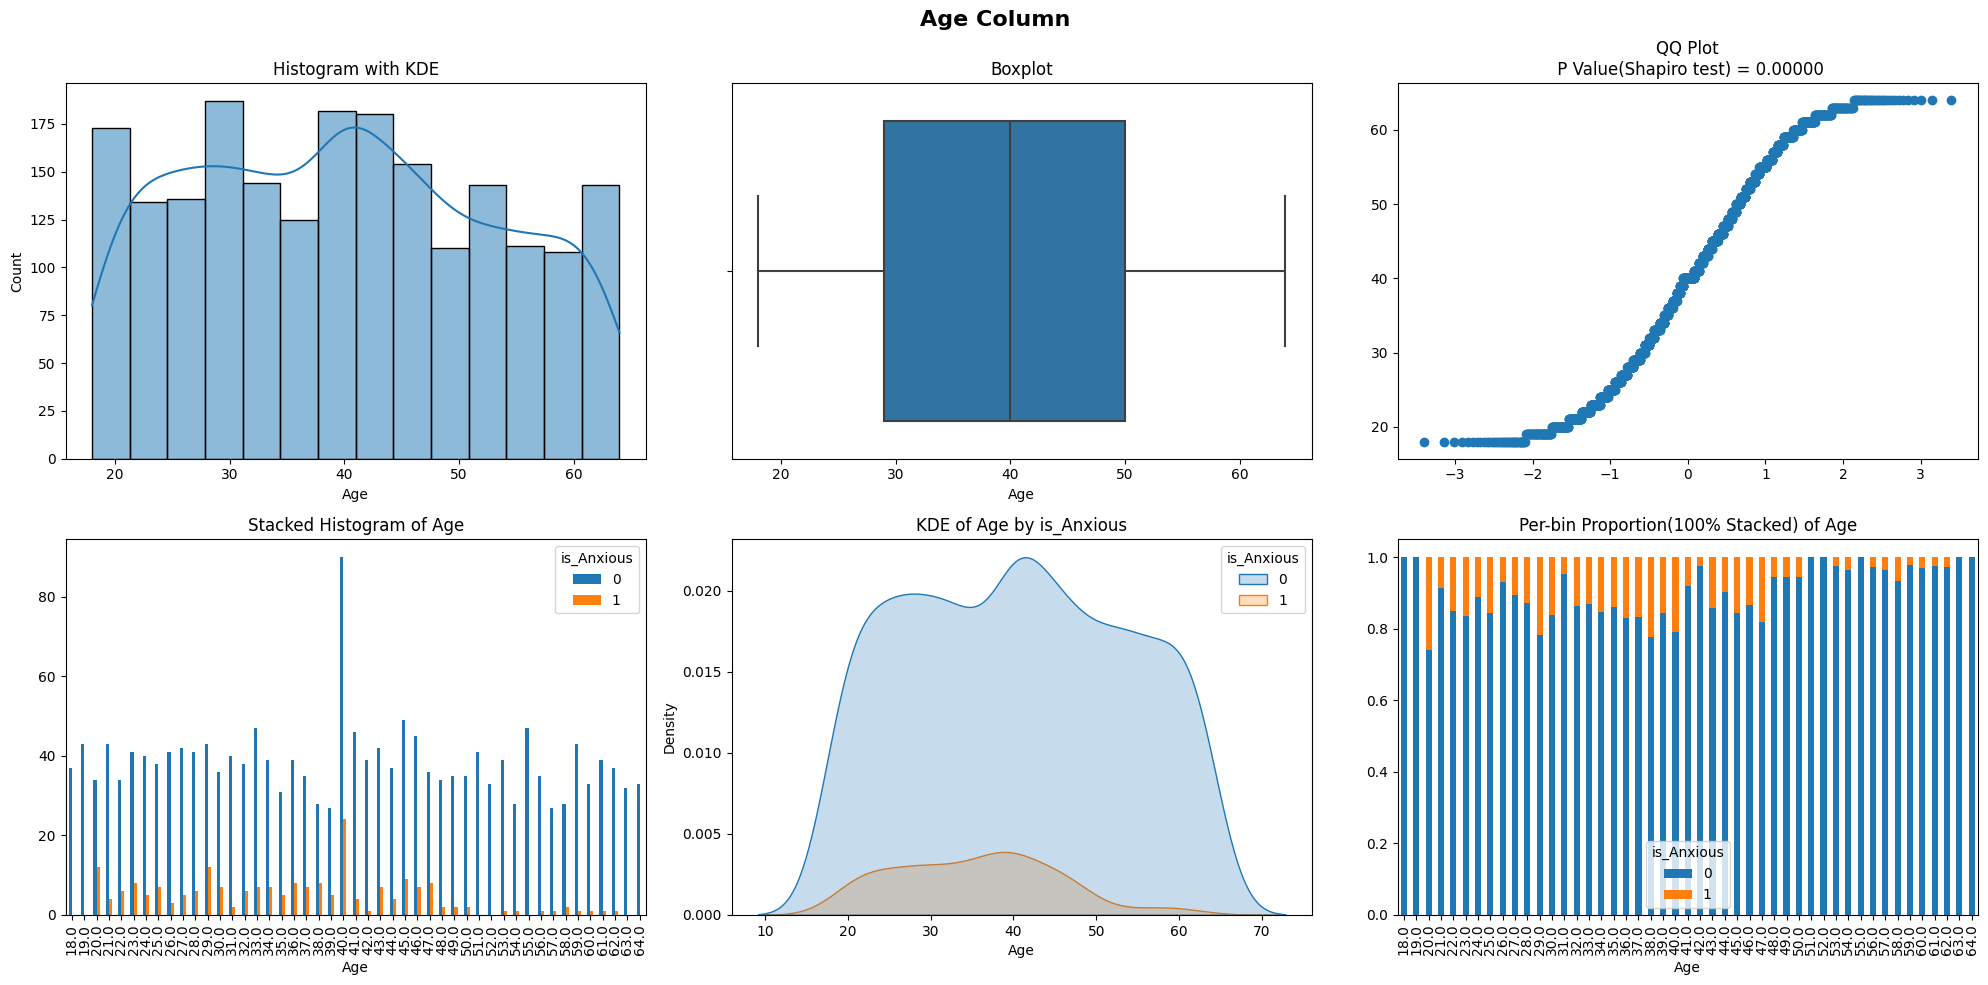

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [135]:
numerical_chart(df, "Age", "is_Anxious")
statistical_tests(df, "Age", "is_Anxious")

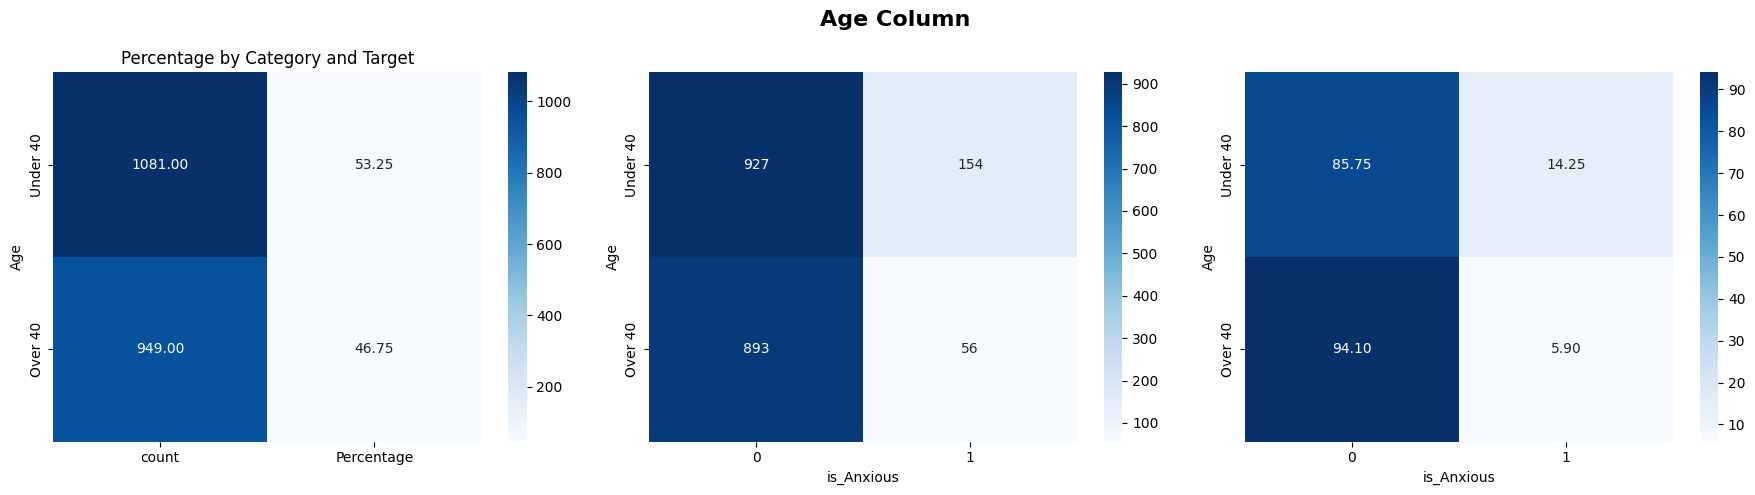

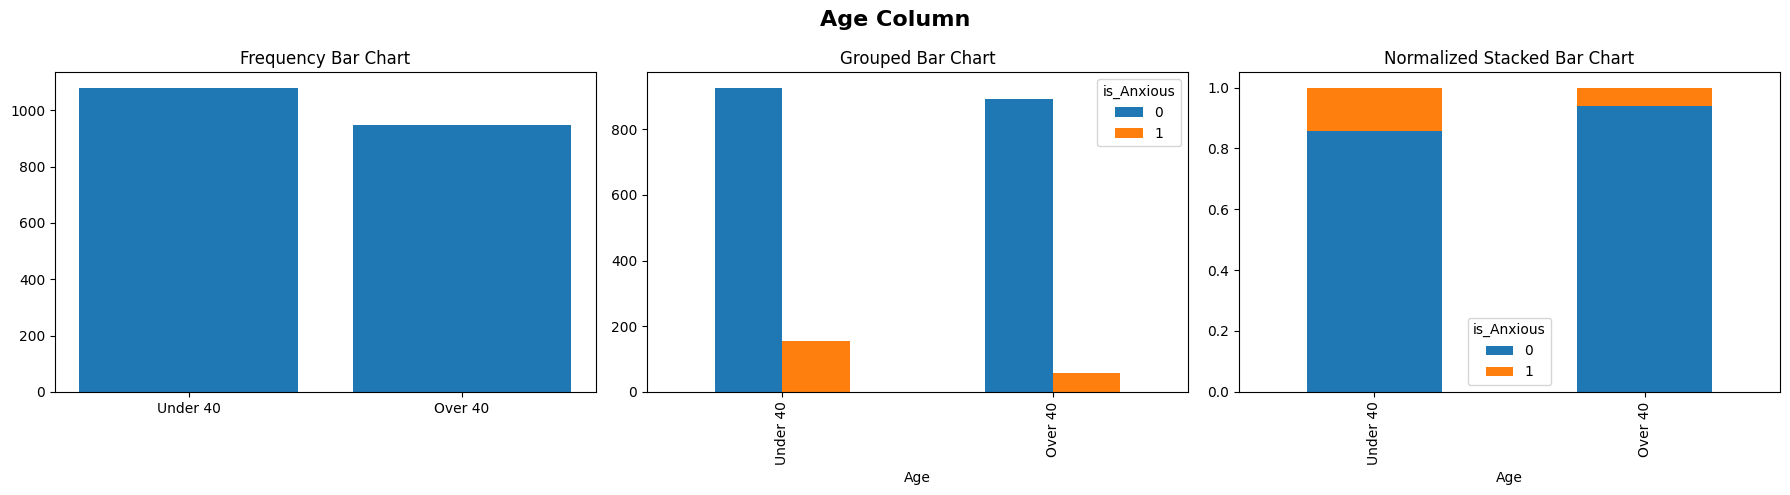

In [136]:
bins = [0,40,70]
labels = ["Under 40","Over 40"]
binning(df, "Age", bins, labels)

show_category_data(df, "Age", "is_Anxious")

#### Sleep Hours

c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

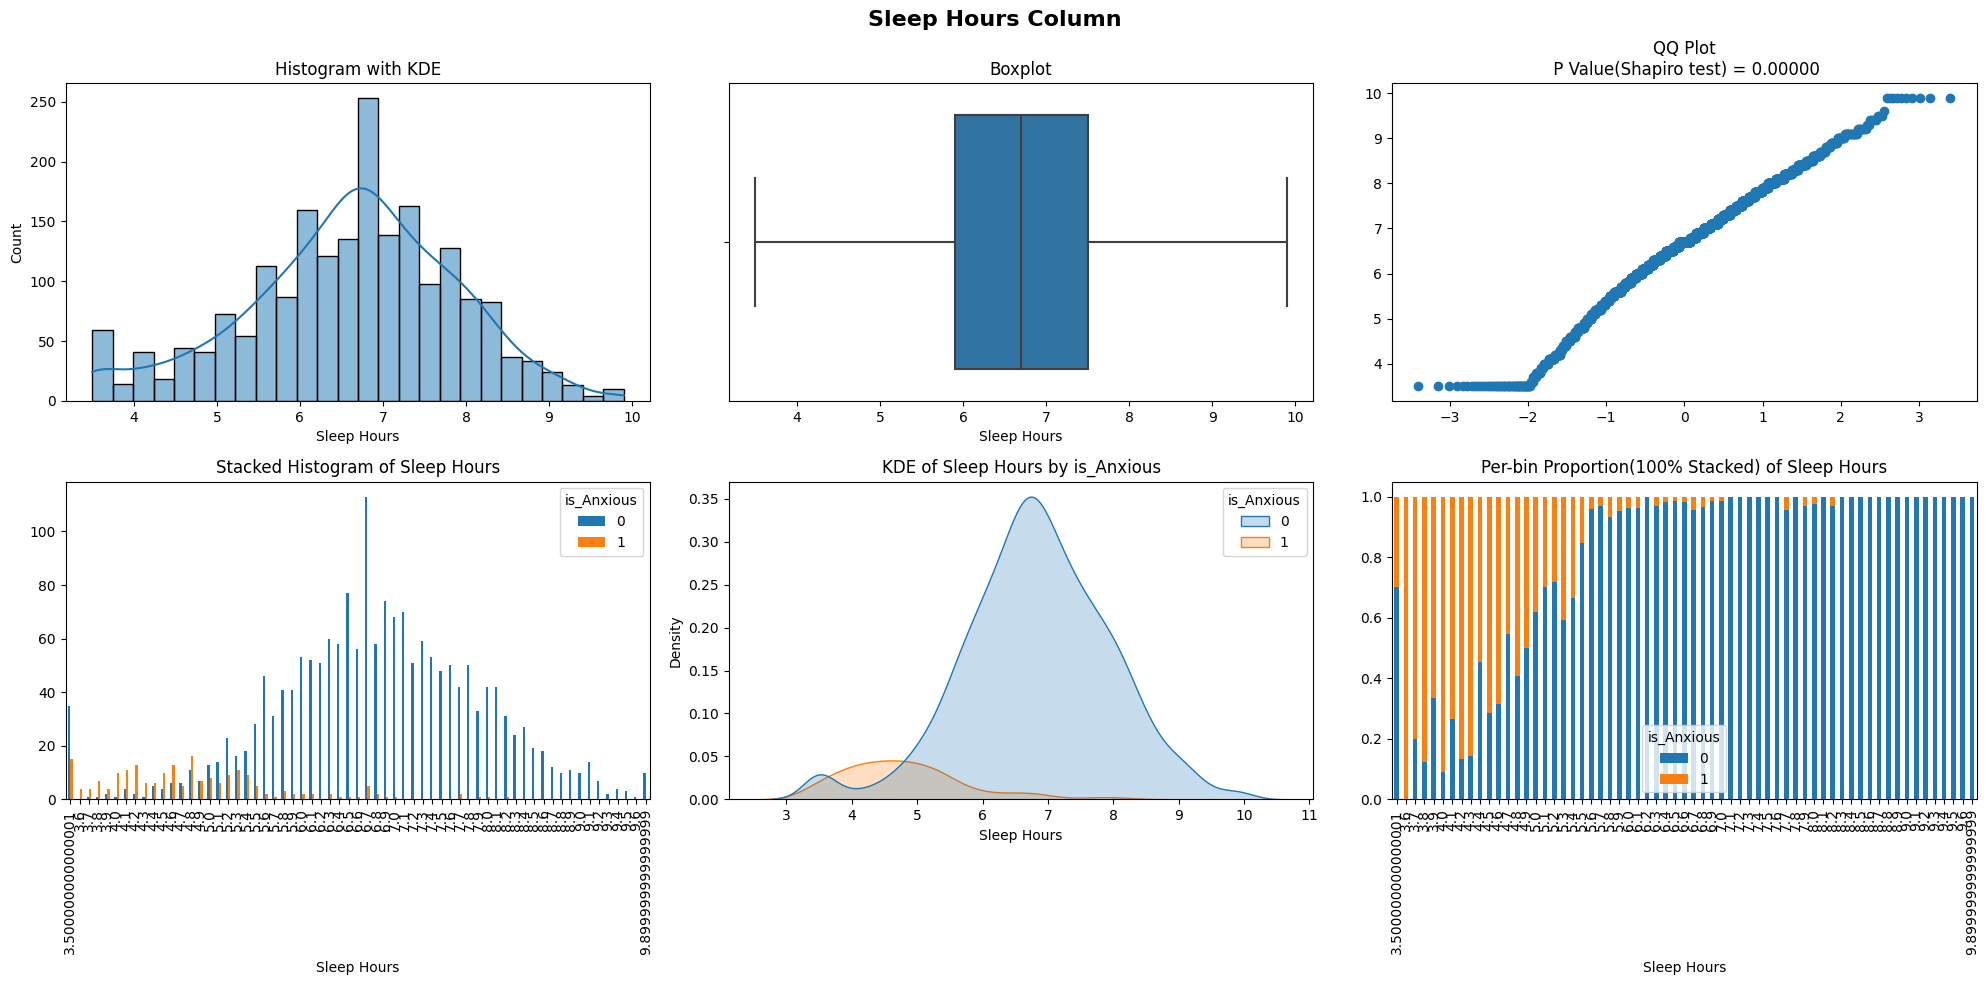

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [137]:
numerical_chart(df, "Sleep Hours", "is_Anxious")
statistical_tests(df, "Sleep Hours", "is_Anxious")

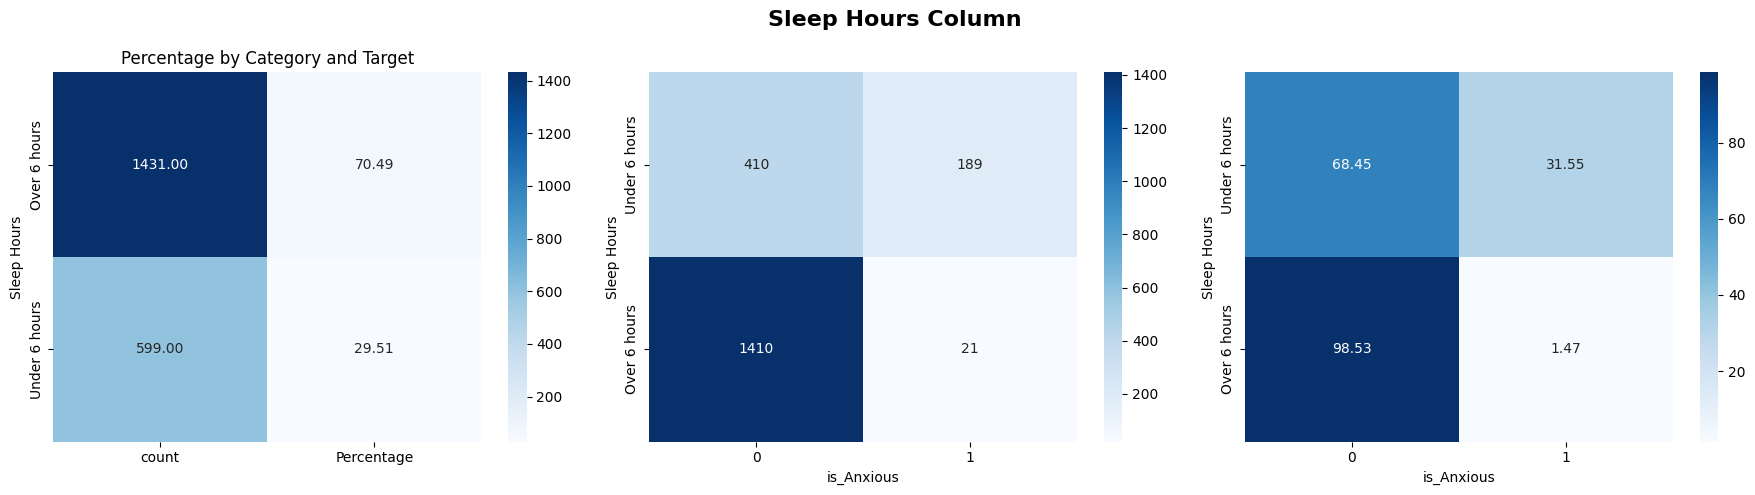

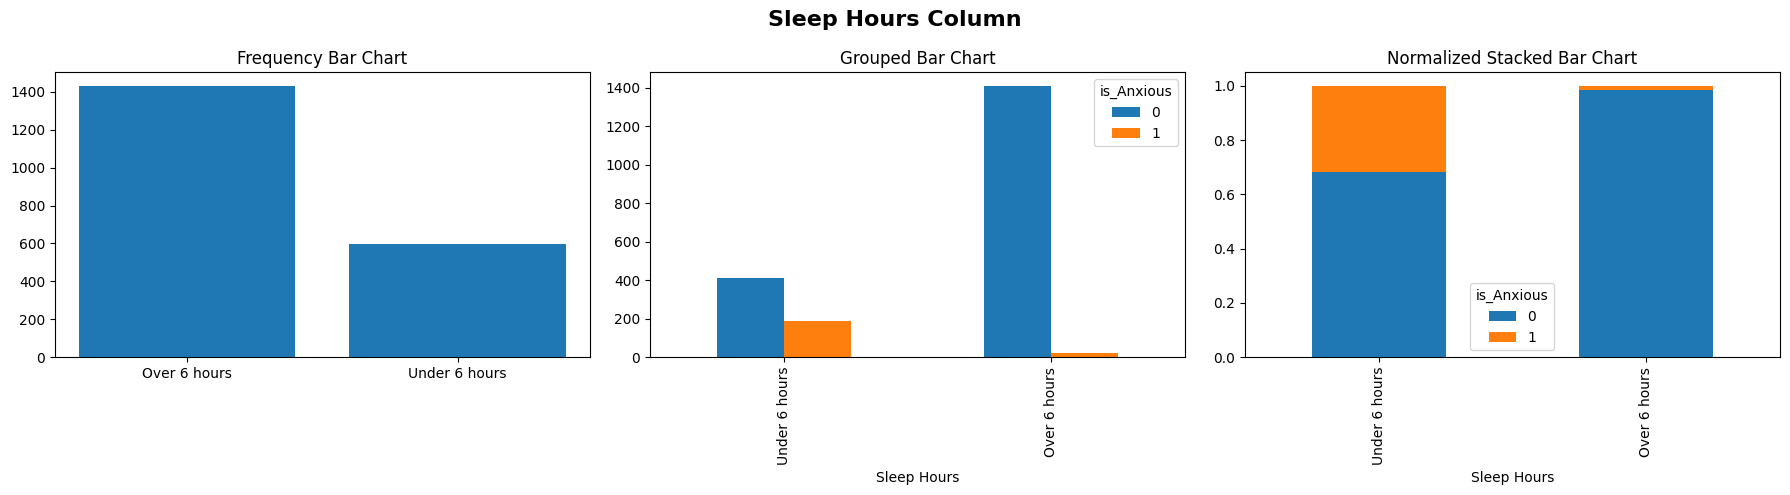

In [138]:
bins = [0,6,10]
labels = ["Under 6 hours","Over 6 hours"]
binning(df, "Sleep Hours", bins, labels)

show_category_data(df, "Sleep Hours", "is_Anxious")

#### Physical Activity (hrs/week)

c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

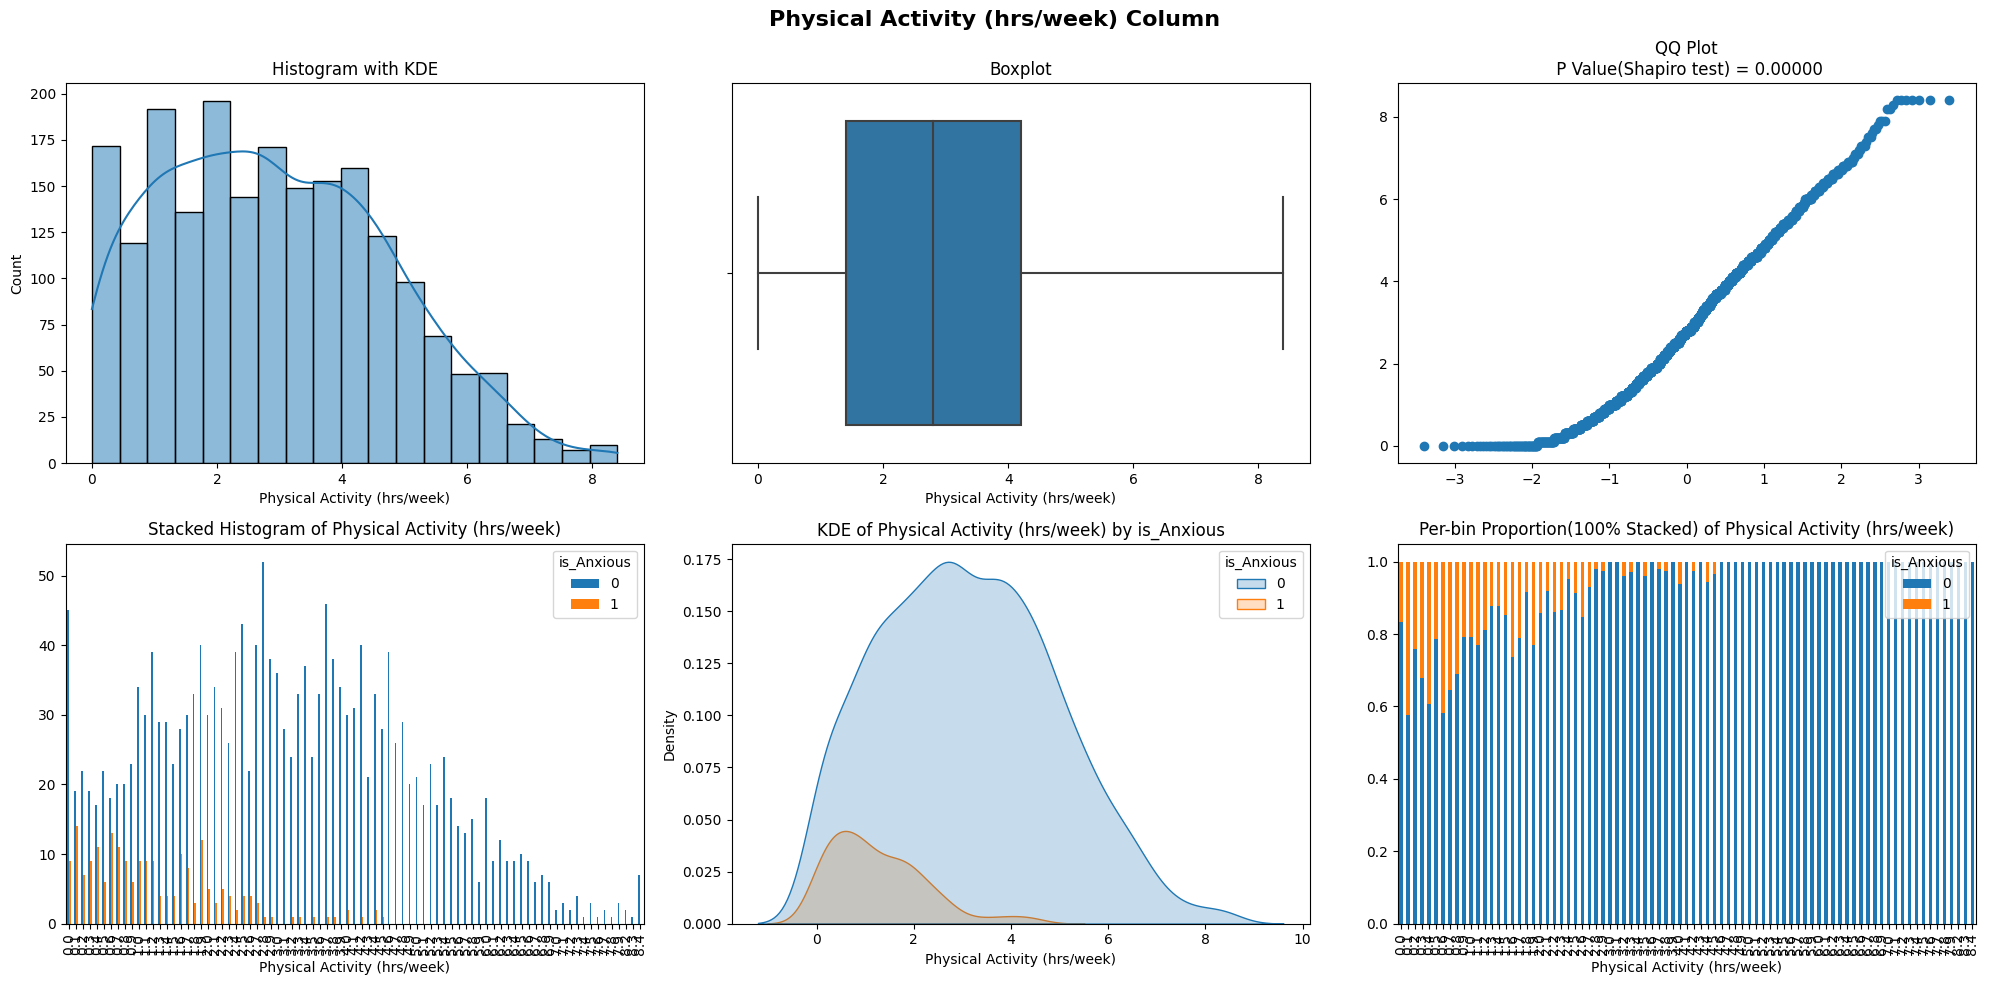

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [139]:
numerical_chart(df, "Physical Activity (hrs/week)", "is_Anxious")
statistical_tests(df, "Physical Activity (hrs/week)", "is_Anxious")

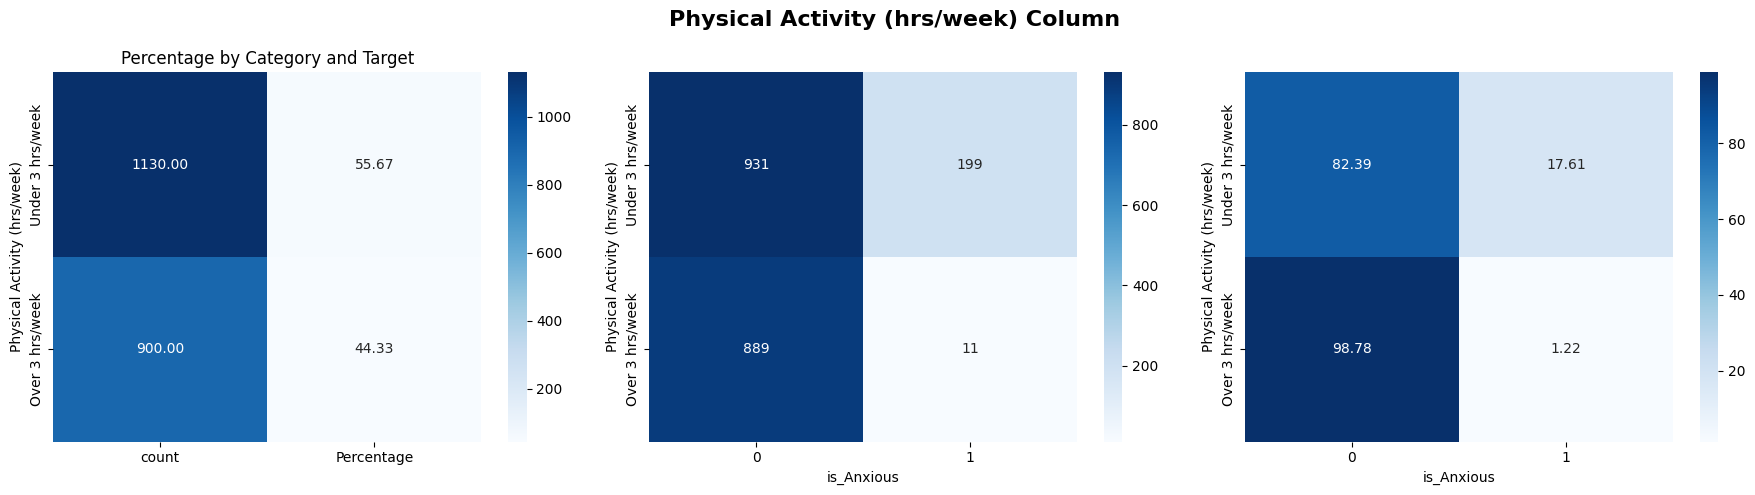

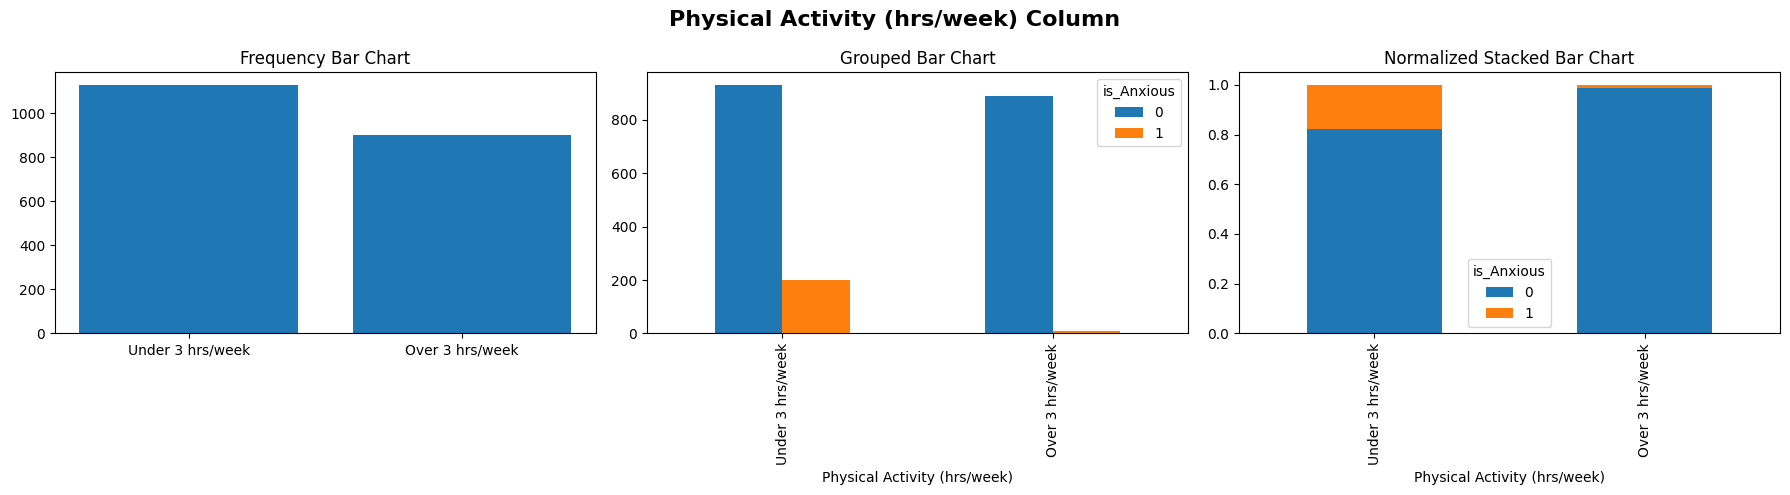

In [140]:
bins = [0,3,10]
labels = ["Under 3 hrs/week","Over 3 hrs/week"]
binning(df, "Physical Activity (hrs/week)", bins, labels)

show_category_data(df, "Physical Activity (hrs/week)", "is_Anxious")

#### Caffeine Intake (mg/day)

c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

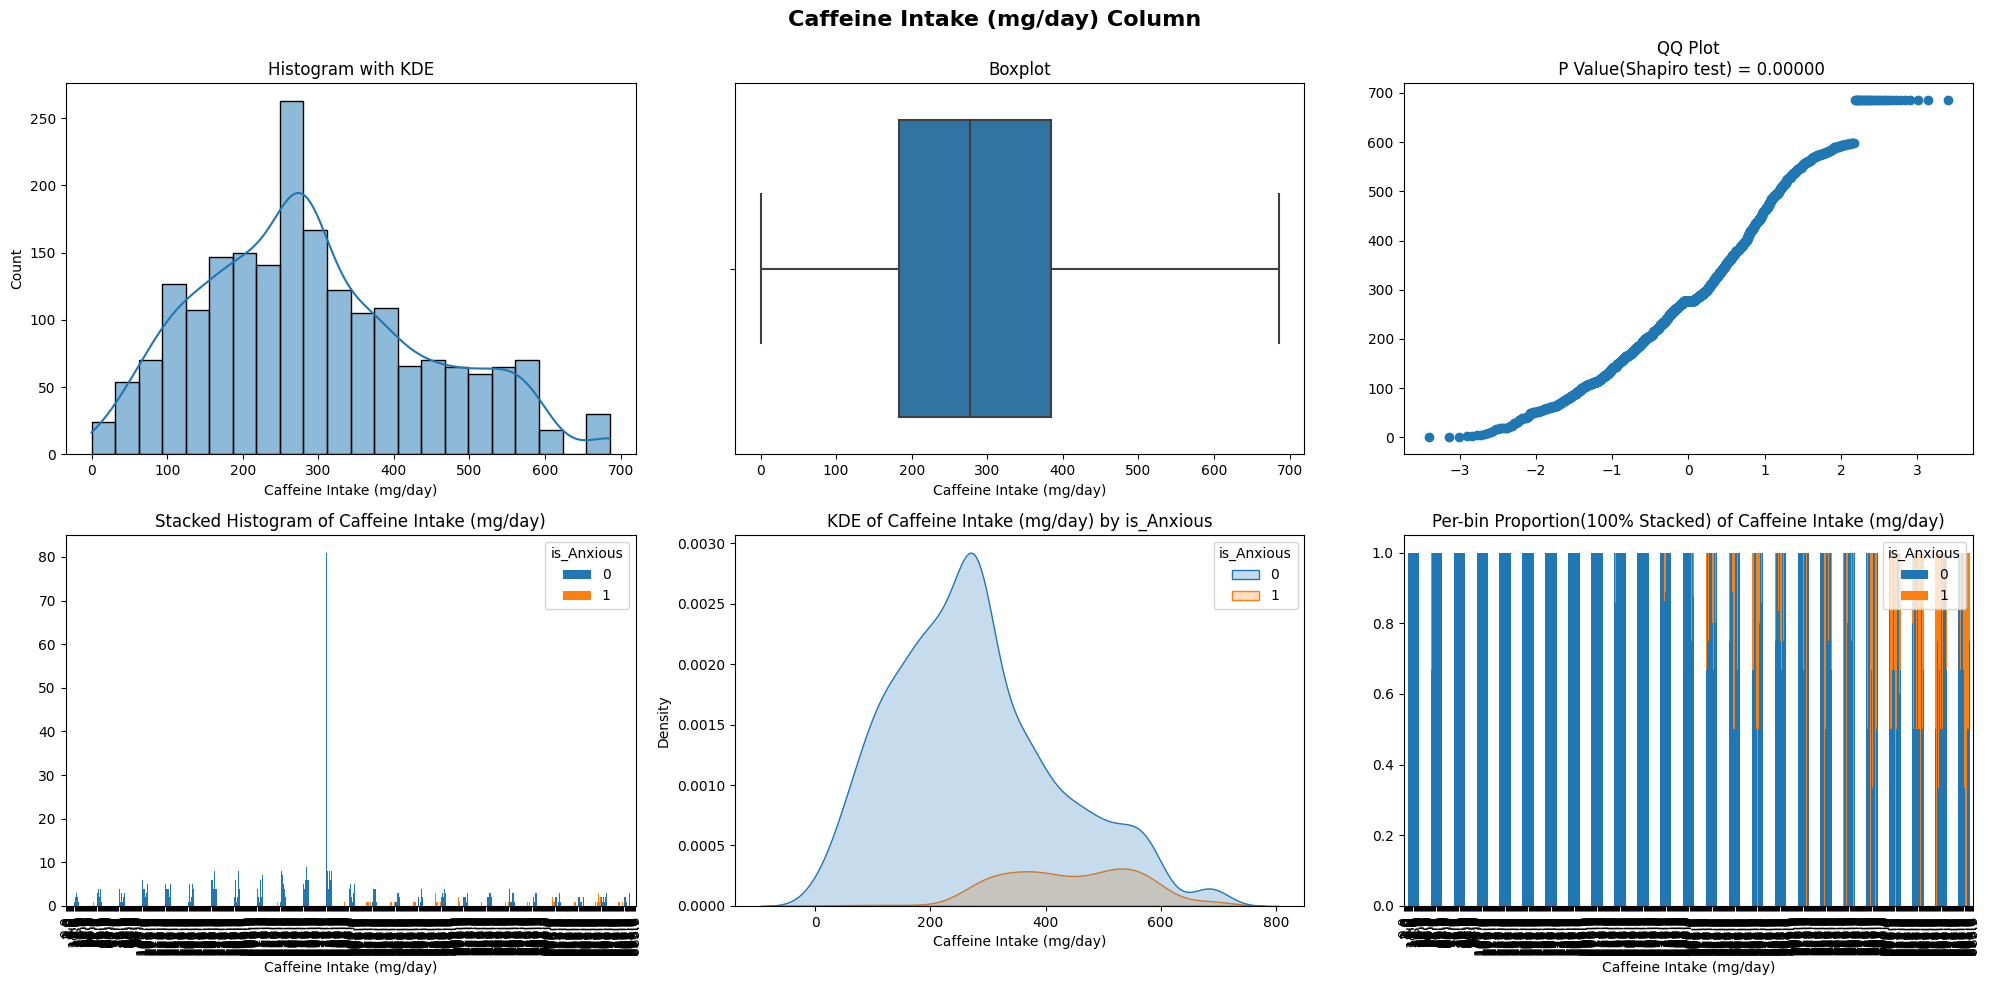

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [141]:
numerical_chart(df, "Caffeine Intake (mg/day)", "is_Anxious")
statistical_tests(df, "Caffeine Intake (mg/day)", "is_Anxious")

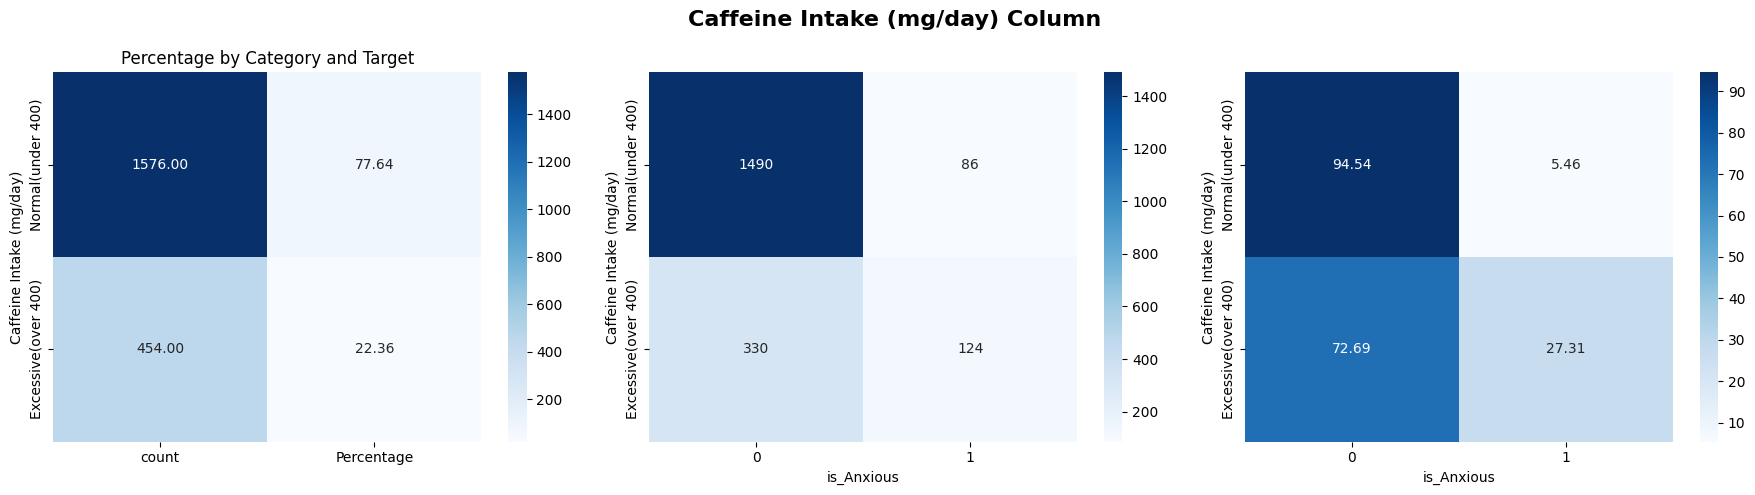

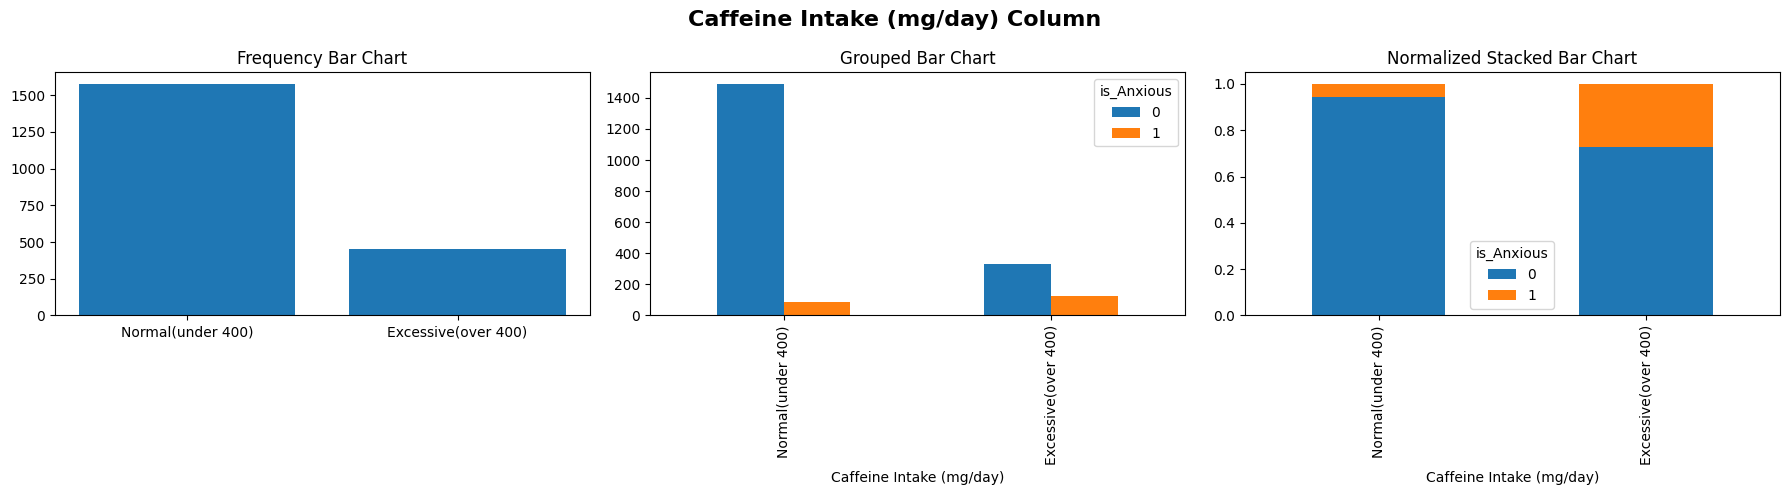

In [142]:
bins = [0,400,700]
labels = ["Normal(under 400)","Excessive(over 400)"]
binning(df, "Caffeine Intake (mg/day)", bins, labels)

show_category_data(df, "Caffeine Intake (mg/day)", "is_Anxious")

#### Alcohol Consumption (drinks/week)

c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arwin\anaconda3\envs\arwin\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


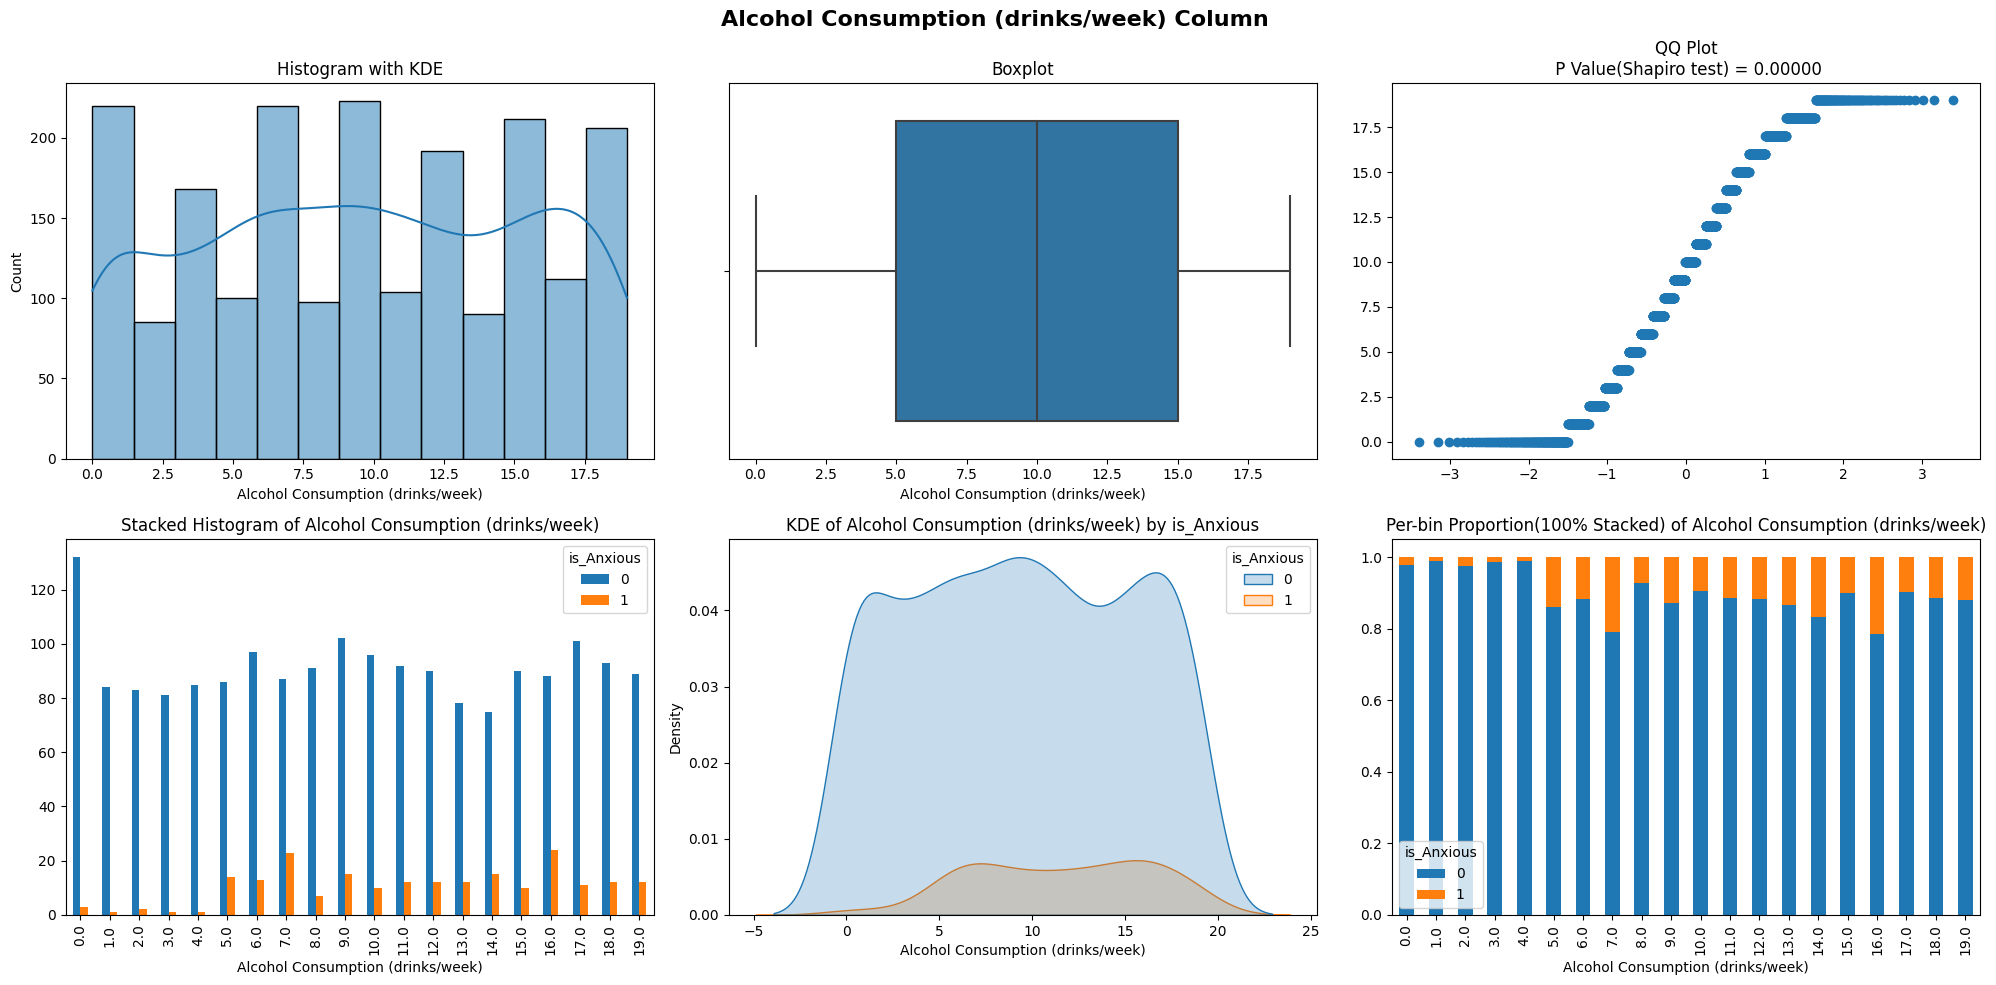

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [143]:
numerical_chart(df, "Alcohol Consumption (drinks/week)", "is_Anxious")
statistical_tests(df, "Alcohol Consumption (drinks/week)", "is_Anxious")

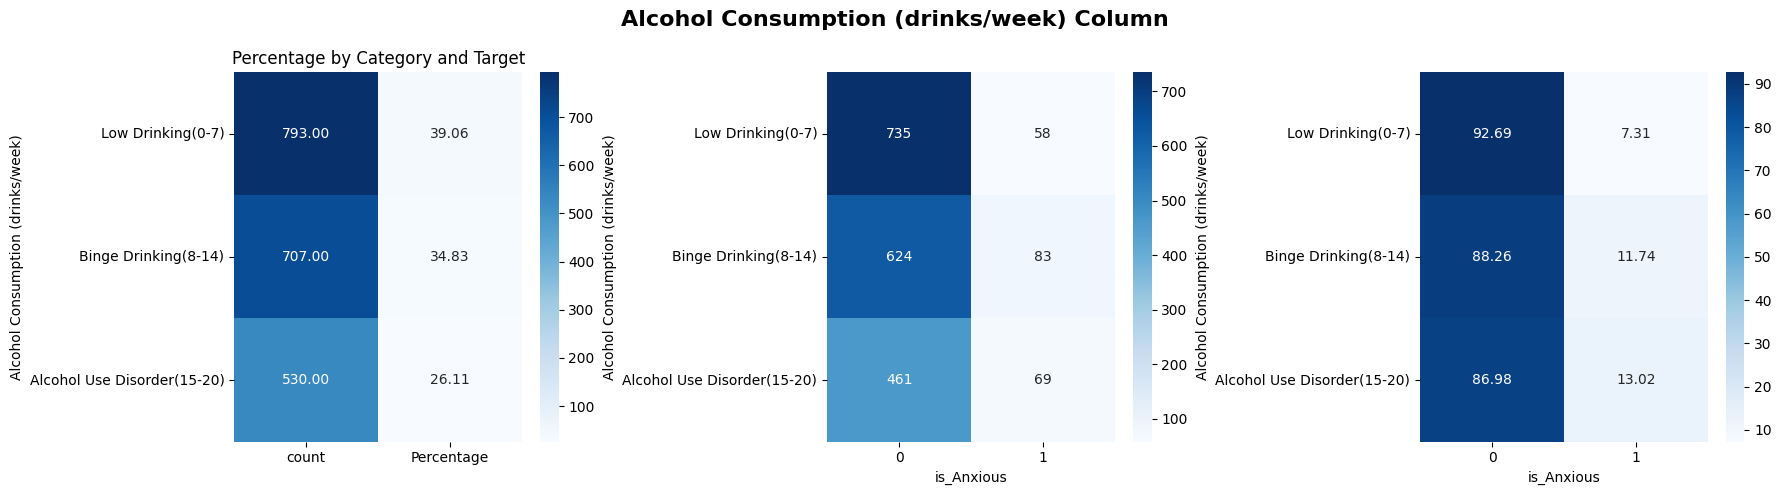

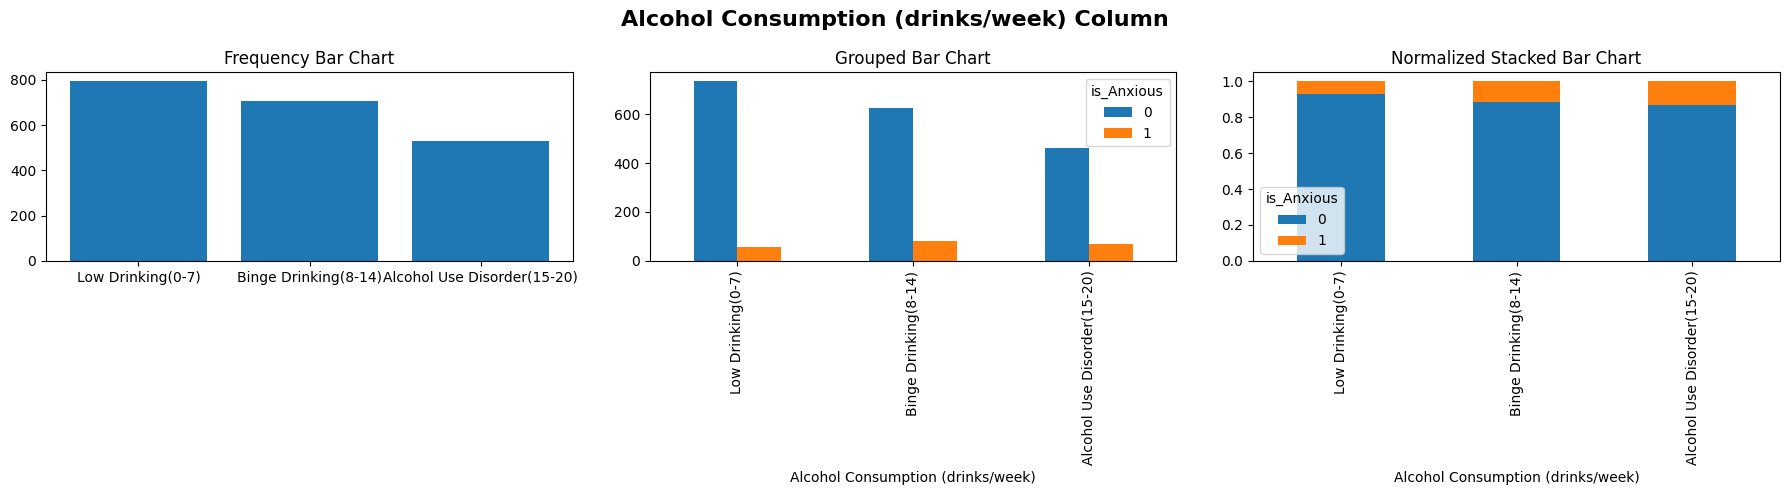

In [144]:
bins = [0,7,14,20]
labels = ["Low Drinking(0-7)", "Binge Drinking(8-14)", "Alcohol Use Disorder(15-20)"]
binning(df, "Alcohol Consumption (drinks/week)", bins, labels)

show_category_data(df, "Alcohol Consumption (drinks/week)", "is_Anxious")

### Categorical univariate

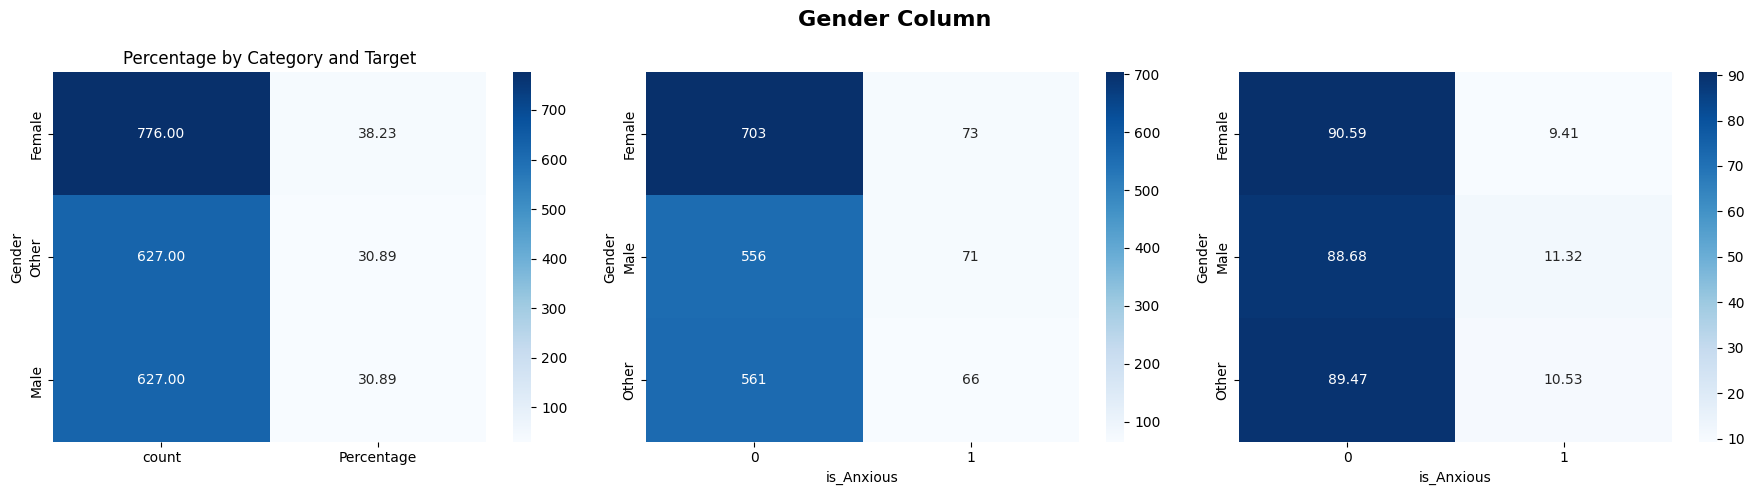

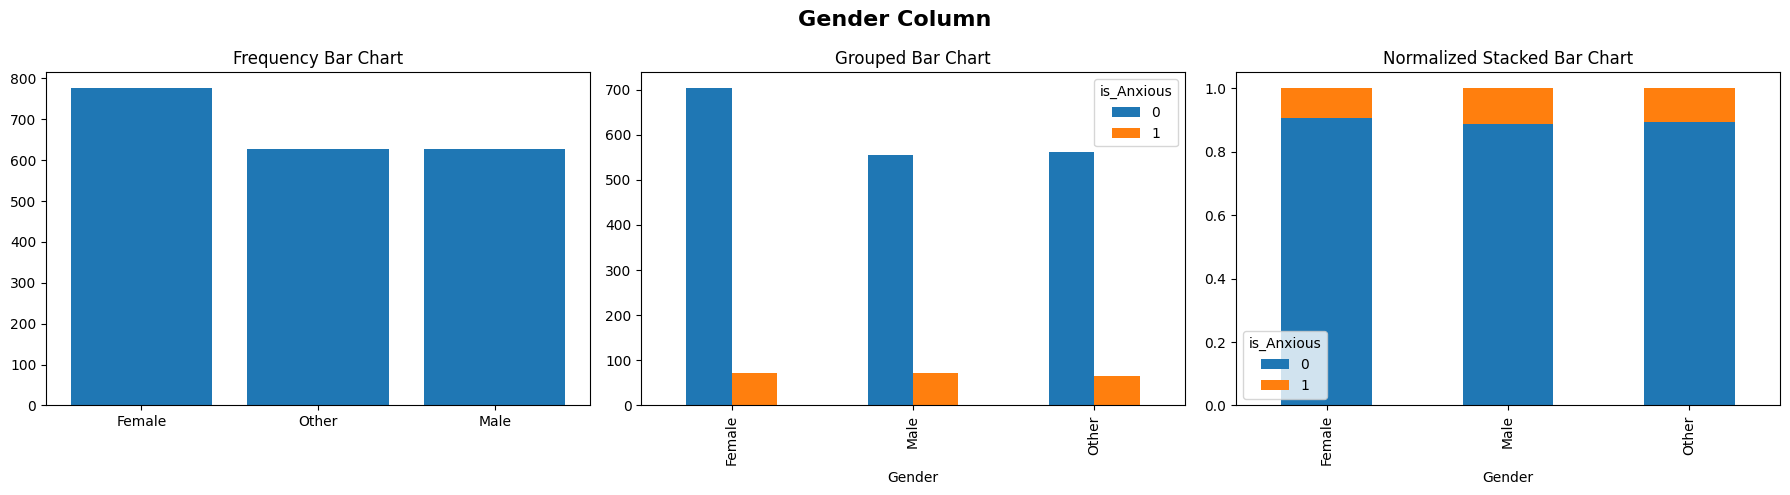

Gender
 P Value: 0.4952


'fail to reject the H0'

In [145]:
show_category_data(df, "Gender", "is_Anxious")
chi2 (df, "Gender", "is_Anxious")

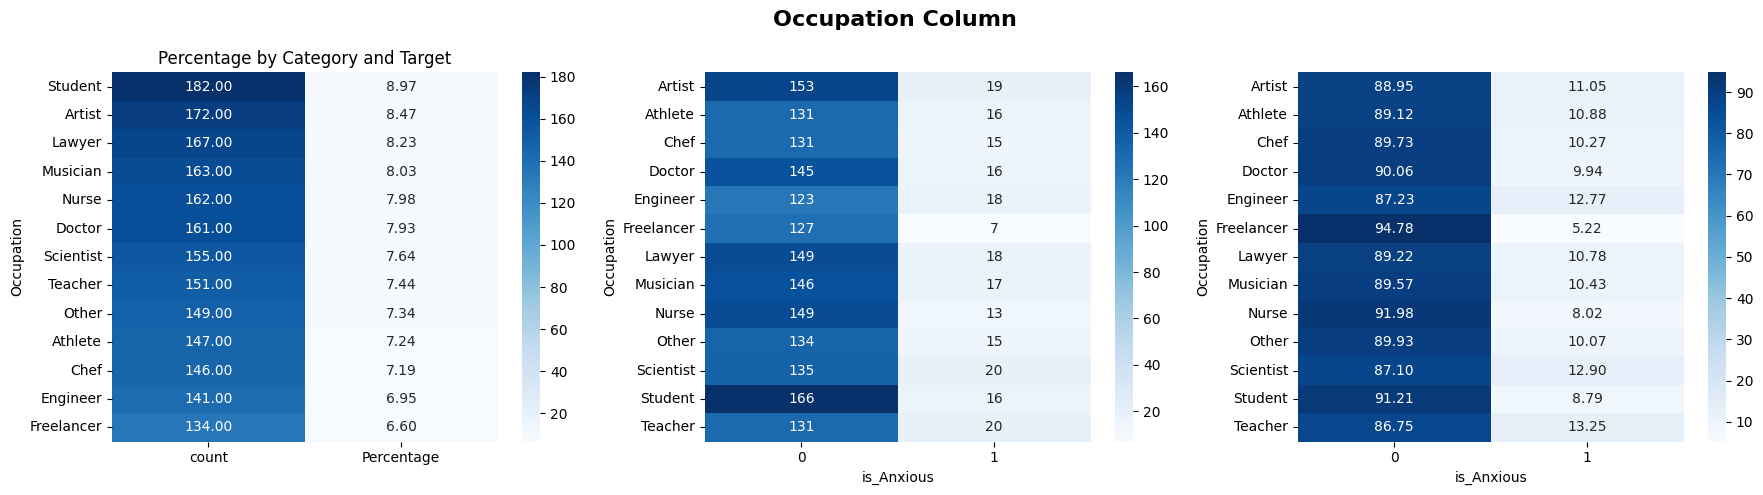

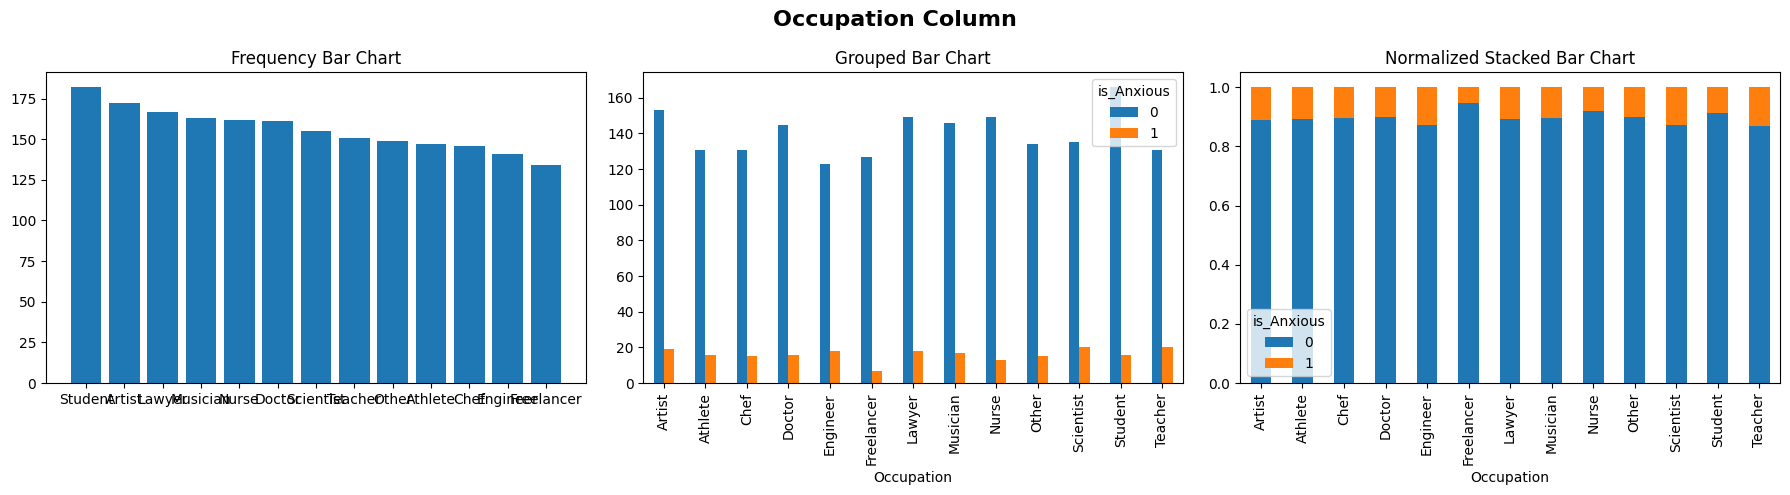

Occupation
 P Value: 0.7223


'fail to reject the H0'

In [146]:
show_category_data(df, "Occupation", "is_Anxious")
chi2 (df, "Occupation", "is_Anxious")

In [147]:
mapping = {'Teacher' : 'Educational', 
           'Student':  'Educational', 
           'Scientist':'Professional', 
           'Lawyer':   'Professional', 
           'Nurse':    'Professional',
           'Doctor' :  'Professional',
           'Engineer': 'Professional',
           'Athlete' : 'Sports',
           'Musician': 'Creative',
           'Artist':   'Creative',
           'Chef':     'Creative' ,
           'Other':    'Freelance / Other', 
           'Freelancer': 'Freelance / Other'
      }

reclassifying(df, "Occupation", mapping)

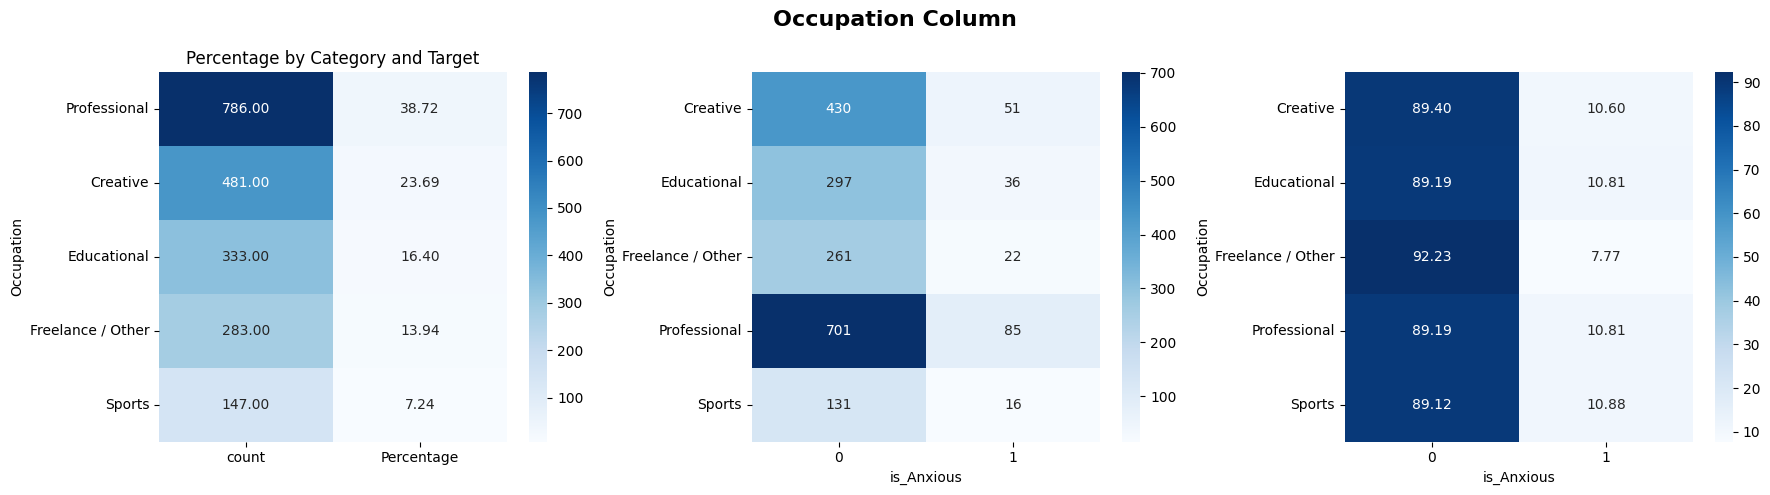

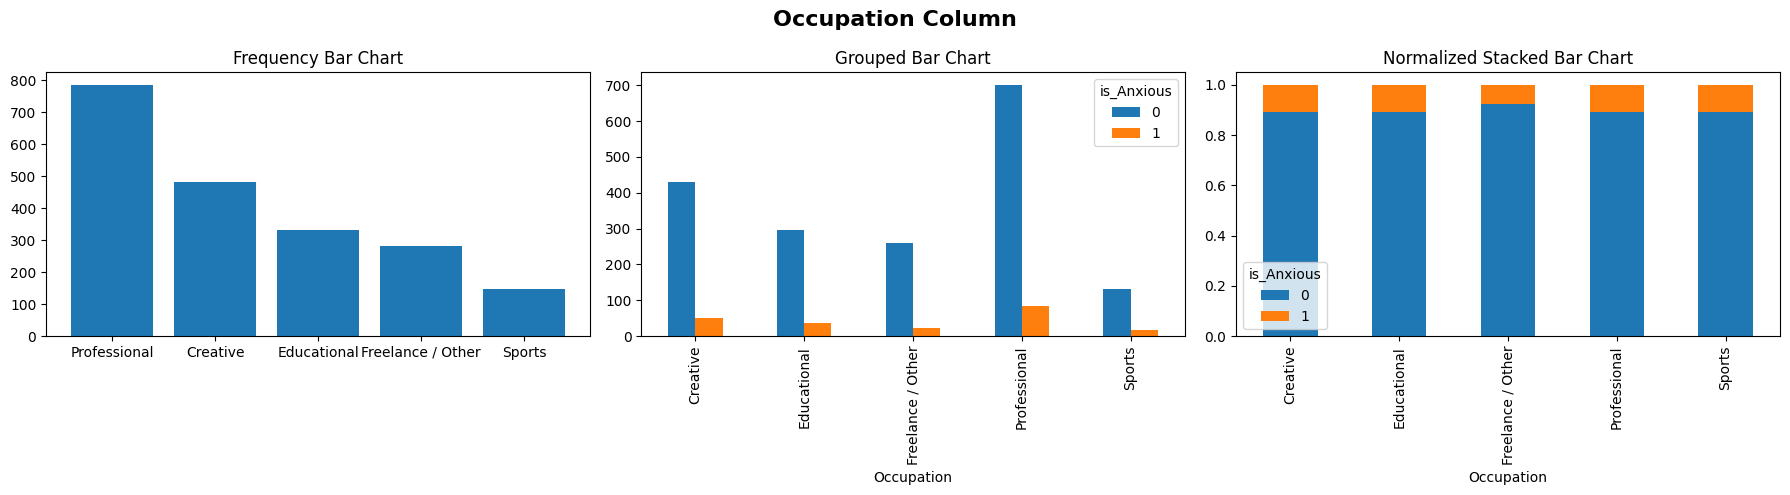

Occupation
 P Value: 0.6695


'fail to reject the H0'

In [148]:
show_category_data(df, "Occupation", "is_Anxious")
chi2 (df, "Occupation", "is_Anxious")

### Two numeric variables

In [149]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)', 'Target', 'is_Anxious',
       'Therapy History'],
      dtype='object')

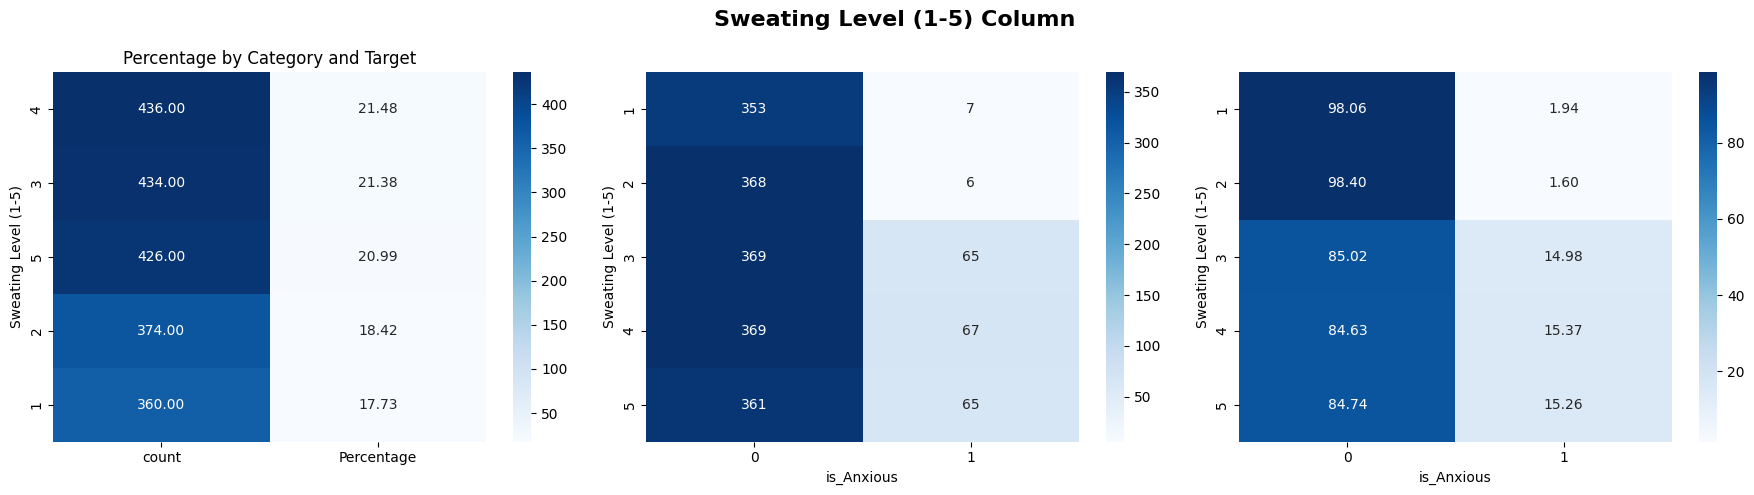

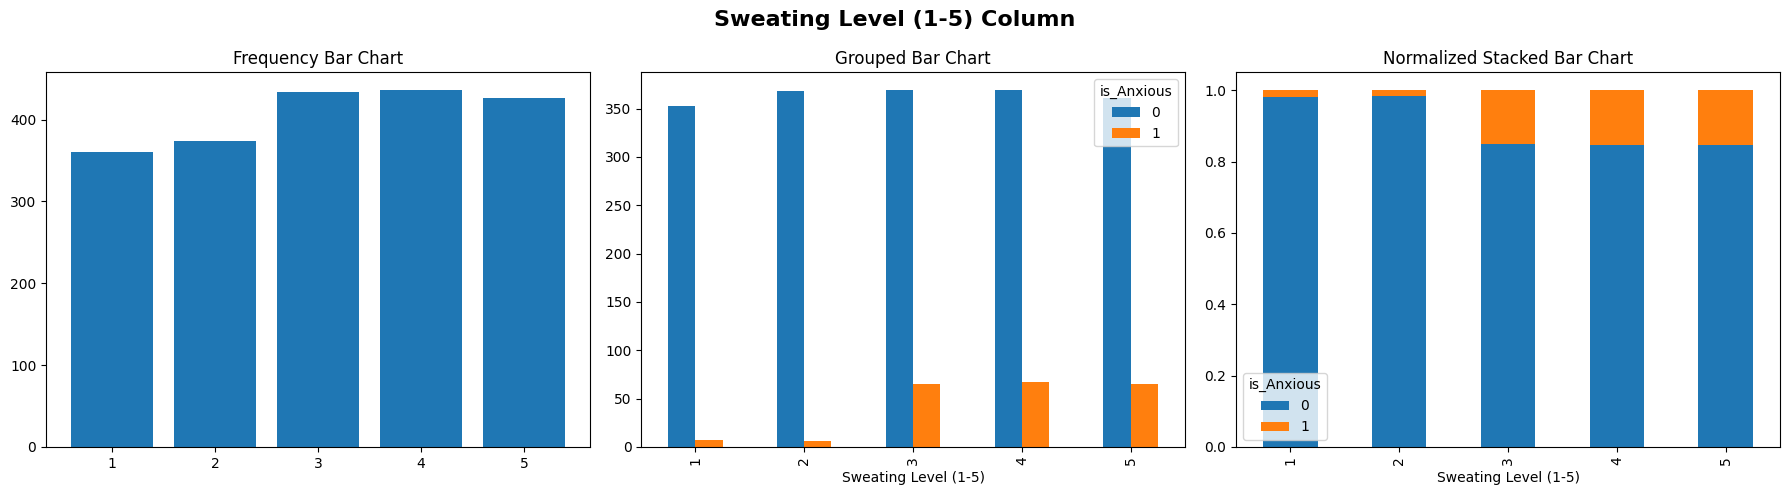

Sweating Level (1-5) vs is_Anxious
Chi-square statistic: 91.1834
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [150]:
show_numeric_categorical_data(df, 'Sweating Level (1-5)', 'is_Anxious')
ordinal_chi2(df, 'Sweating Level (1-5)', 'is_Anxious')

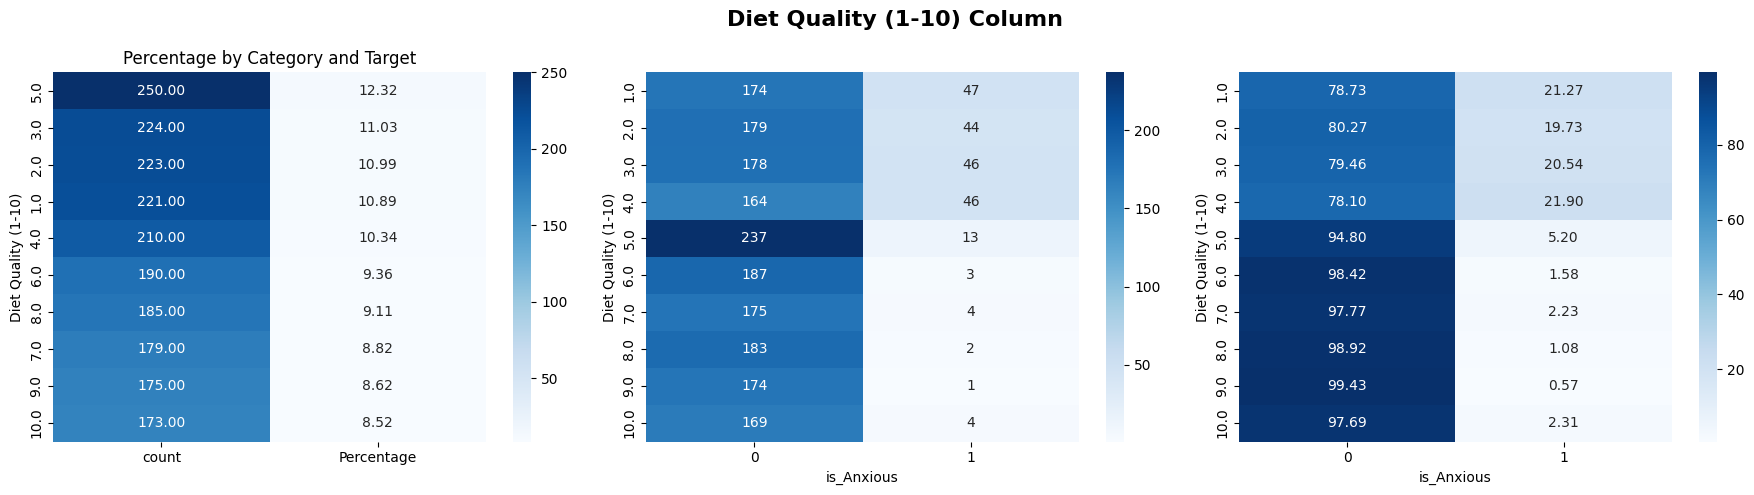

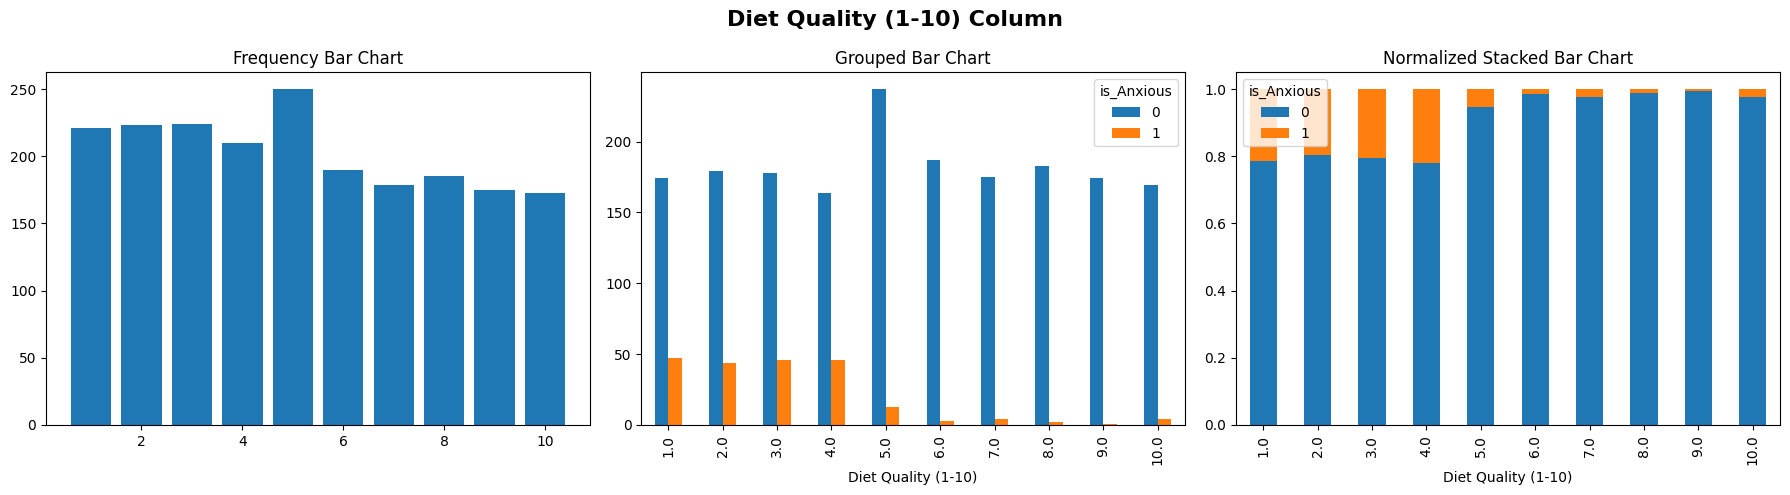

Diet Quality (1-10) vs is_Anxious
Chi-square statistic: 187.6955
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [151]:
show_numeric_categorical_data(df, 'Diet Quality (1-10)', 'is_Anxious')
ordinal_chi2(df, 'Diet Quality (1-10)', 'is_Anxious')

### Categorical binomial

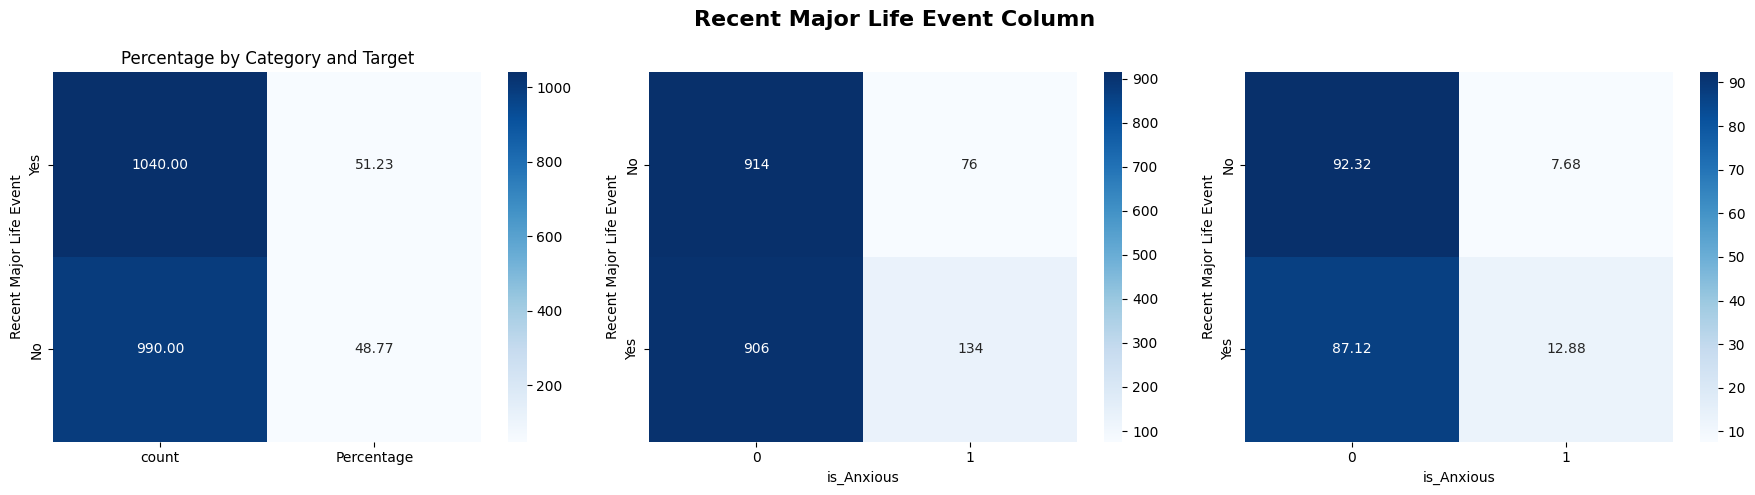

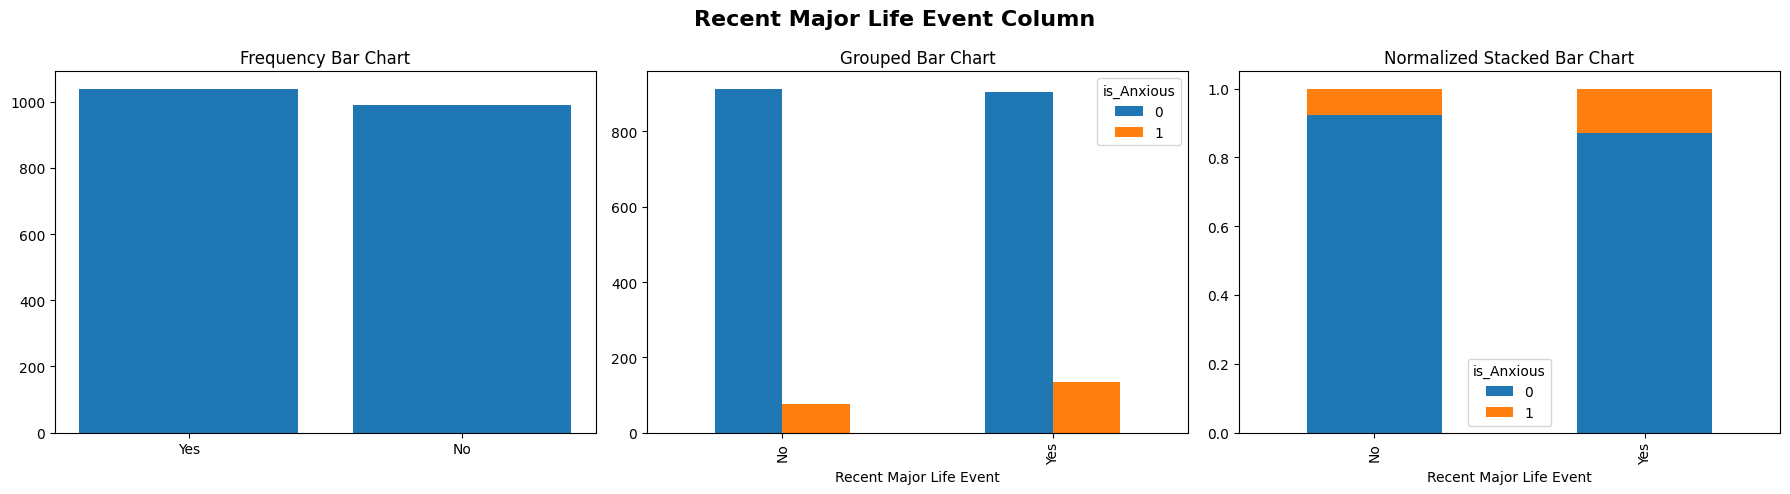

Recent Major Life Event vs is_Anxious
Chi-square statistic: 14.2755
P Value: 0.0002
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [152]:
show_numeric_categorical_data(df, 'Recent Major Life Event', 'is_Anxious')
ordinal_chi2(df, 'Recent Major Life Event', 'is_Anxious')

### Categorical and numeric binomial

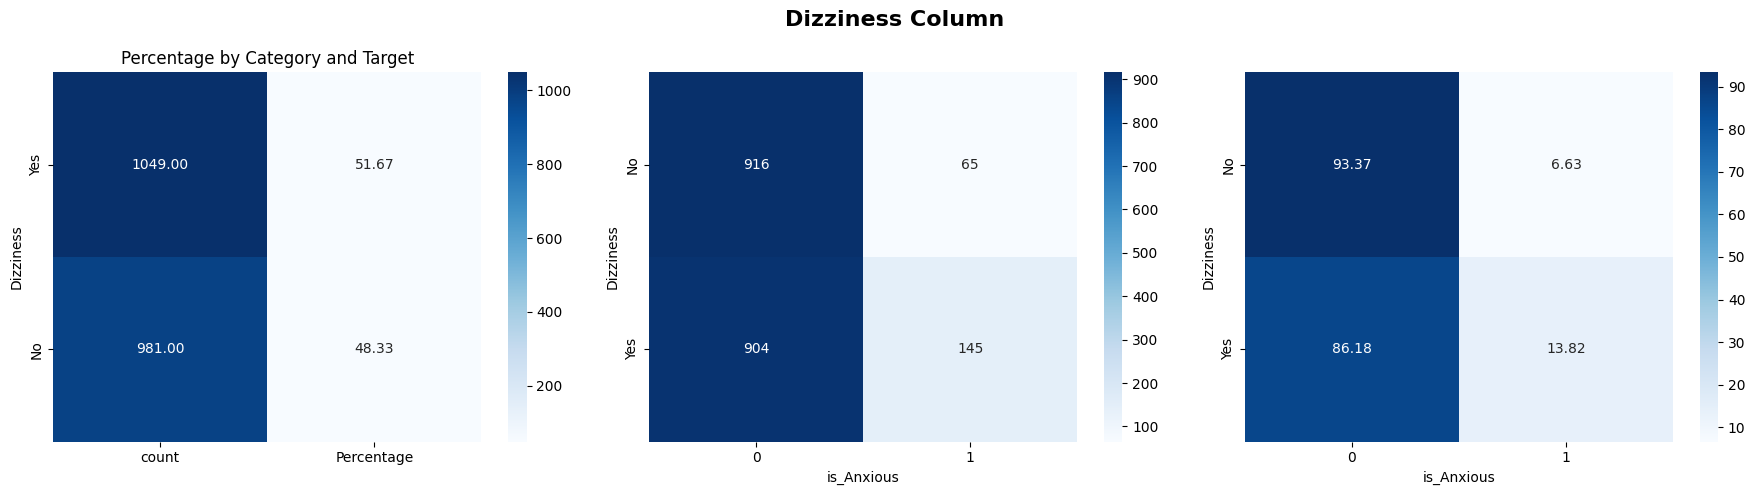

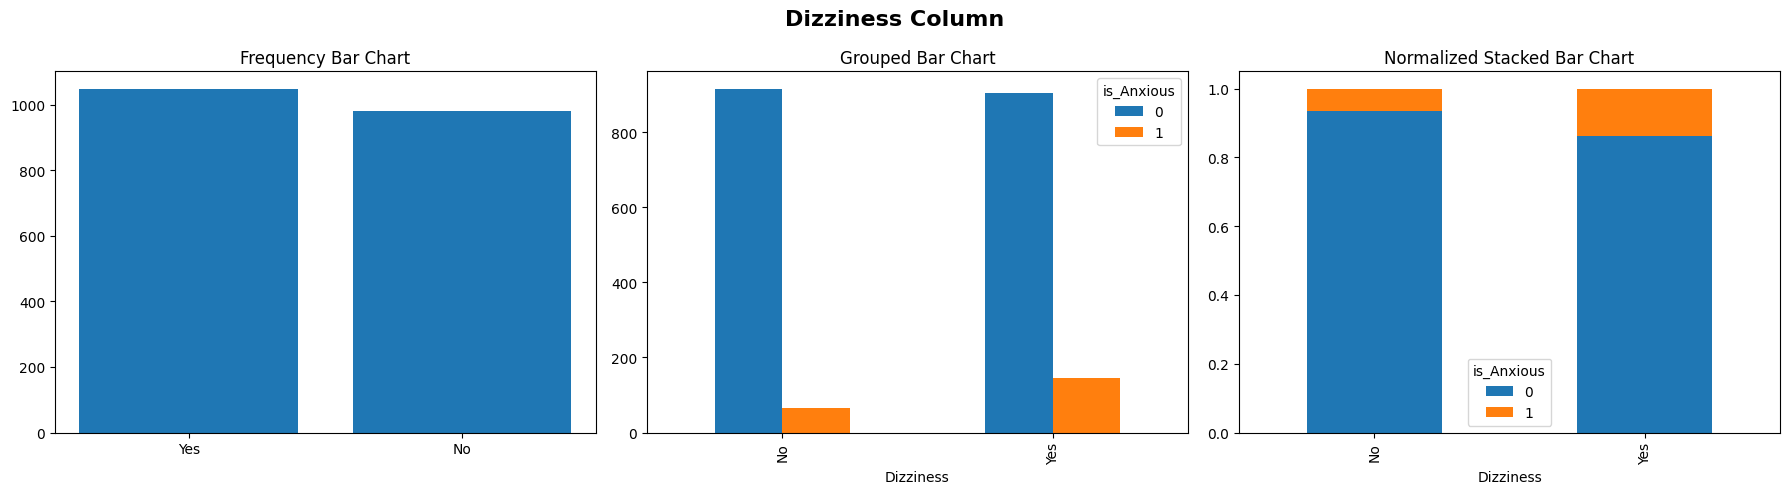

Dizziness vs is_Anxious
Chi-square statistic: 27.5386
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [153]:

show_numeric_categorical_data(df, 'Dizziness', 'is_Anxious')
ordinal_chi2(df, 'Dizziness', 'is_Anxious')

['Age',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Heart Rate (bpm)',
 'Breathing Rate (breaths/min)',
 'Therapy Sessions (per month)']

## Feature Engineering (KPIs)

In [160]:
# ============================================================================
# KPI 1: Overall Anxiety Rate
# ============================================================================
anxiety_rate = (df['is_Anxious'].sum() / len(df)) * 100
print(f"Overall Anxiety Rate: {anxiety_rate:.2f}%")
print(f"Total Anxious: {df['is_Anxious'].sum()}")
print(f"Total Not Anxious: {(df['is_Anxious'] == 0).sum()}\n")

# ============================================================================
# KPI 2: Anxiety by Demographics
# ============================================================================
print("Anxiety Rate by Gender:")
gender_anxiety = df.groupby('Gender')['is_Anxious'].agg(['sum', 'count'])
gender_anxiety['rate'] = (gender_anxiety['sum'] / gender_anxiety['count'] * 100).round(2)
print(gender_anxiety)
print()

print("Anxiety Rate by Occupation:")
occupation_anxiety = df.groupby('Occupation')['is_Anxious'].agg(['sum', 'count'])
occupation_anxiety['rate'] = (occupation_anxiety['sum'] / occupation_anxiety['count'] * 100).round(2)
print(occupation_anxiety)
print()

# ============================================================================
# KPI 3: Lifestyle Factors Impact
# ============================================================================
print("Anxiety Rate by Sleep Hours Category:")
sleep_anxiety = df.groupby('Sleep Hours')['is_Anxious'].agg(['sum', 'count'])
sleep_anxiety['rate'] = (sleep_anxiety['sum'] / sleep_anxiety['count'] * 100).round(2)
print(sleep_anxiety)
print()

print("Anxiety Rate by Physical Activity Level:")
activity_anxiety = df.groupby('Physical Activity (hrs/week)')['is_Anxious'].agg(['sum', 'count'])
activity_anxiety['rate'] = (activity_anxiety['sum'] / activity_anxiety['count'] * 100).round(2)
print(activity_anxiety)
print()

# ============================================================================
# KPI 4: Medical Factors Impact
# ============================================================================
print("Anxiety Rate by Heart Rate Category:")
hr_bins = [0, 70, 85, 100, 150]
df['HR_Category'] = pd.cut(df['Heart Rate (bpm)'], bins=hr_bins, labels=['Low', 'Normal', 'Elevated', 'High'])
hr_anxiety = df.groupby('HR_Category')['is_Anxious'].agg(['sum', 'count'])
hr_anxiety['rate'] = (hr_anxiety['sum'] / hr_anxiety['count'] * 100).round(2)
print(hr_anxiety)
print()

# ============================================================================
# KPI 5: Risk Factors Analysis
# ============================================================================
print("Anxiety Rate by Smoking Status:")
smoking_anxiety = df.groupby('Smoking')['is_Anxious'].agg(['sum', 'count'])
smoking_anxiety['rate'] = (smoking_anxiety['sum'] / smoking_anxiety['count'] * 100).round(2)
print(smoking_anxiety)
print()

print("Anxiety Rate by Family History of Anxiety:")
family_anxiety = df.groupby('Family History of Anxiety')['is_Anxious'].agg(['sum', 'count'])
family_anxiety['rate'] = (family_anxiety['sum'] / family_anxiety['count'] * 100).round(2)
print(family_anxiety)
print()

print("Anxiety Rate by Medication Usage:")
med_anxiety = df.groupby('Medication')['is_Anxious'].agg(['sum', 'count'])
med_anxiety['rate'] = (med_anxiety['sum'] / med_anxiety['count'] * 100).round(2)
print(med_anxiety)
print()

# ============================================================================
# KPI 6: Therapy Impact
# ============================================================================
print("Anxiety Rate by Therapy Sessions Per Month:")
therapy_anxiety = df.groupby('Therapy Sessions (per month)')['is_Anxious'].agg(['sum', 'count'])
therapy_anxiety['rate'] = (therapy_anxiety['sum'] / therapy_anxiety['count'] * 100).round(2)
print(therapy_anxiety)
print()

Overall Anxiety Rate: 10.34%
Total Anxious: 210
Total Not Anxious: 1820

Anxiety Rate by Gender:
        sum  count   rate
Gender                   
Female   73    776   9.41
Male     71    627  11.32
Other    66    627  10.53

Anxiety Rate by Occupation:
                   sum  count   rate
Occupation                          
Creative            51    481  10.60
Educational         36    333  10.81
Freelance / Other   22    283   7.77
Professional        85    786  10.81
Sports              16    147  10.88

Anxiety Rate by Sleep Hours Category:
               sum  count   rate
Sleep Hours                     
Under 6 hours  189    599  31.55
Over 6 hours    21   1431   1.47

Anxiety Rate by Physical Activity Level:
                              sum  count   rate
Physical Activity (hrs/week)                   
Under 3 hrs/week              199   1130  17.61
Over 3 hrs/week                11    900   1.22

Anxiety Rate by Heart Rate Category:
             sum  count   rate
HR_Category

C:\Users\arwin\AppData\Local\Temp\ipykernel_8940\757654385.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_anxiety = df.groupby('Sleep Hours')['is_Anxious'].agg(['sum', 'count'])
C:\Users\arwin\AppData\Local\Temp\ipykernel_8940\757654385.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_anxiety = df.groupby('Physical Activity (hrs/week)')['is_Anxious'].agg(['sum', 'count'])
C:\Users\arwin\AppData\Local\Temp\ipykernel_8940\757654385.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu


ANXIETY RATE VISUALIZATIONS



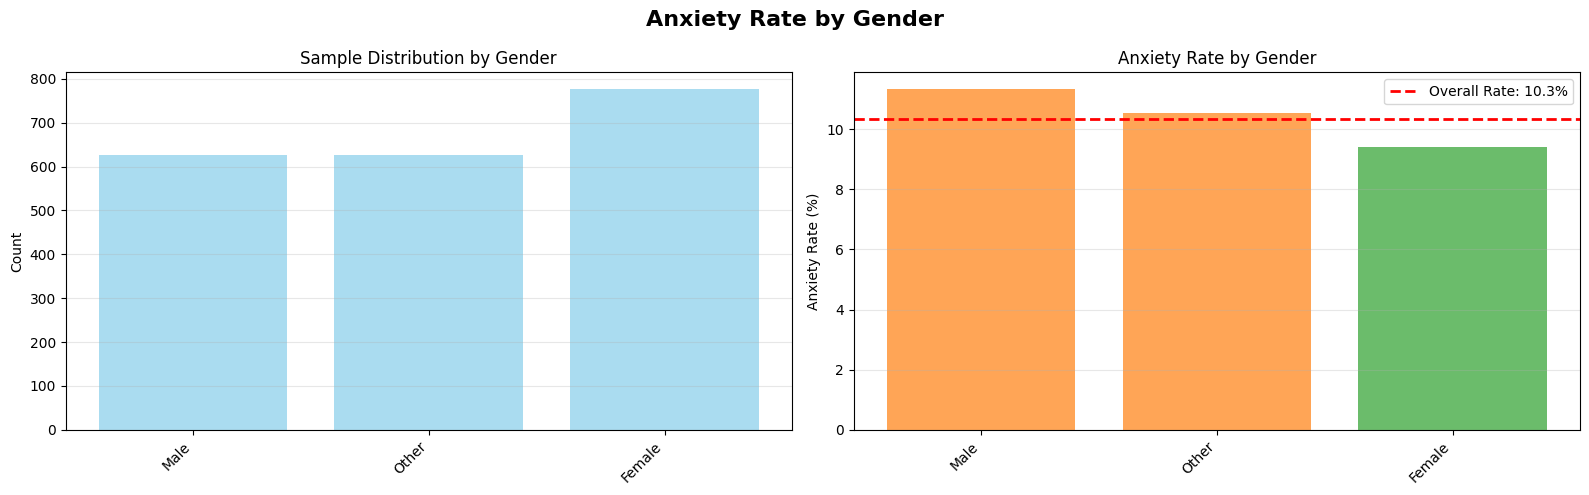

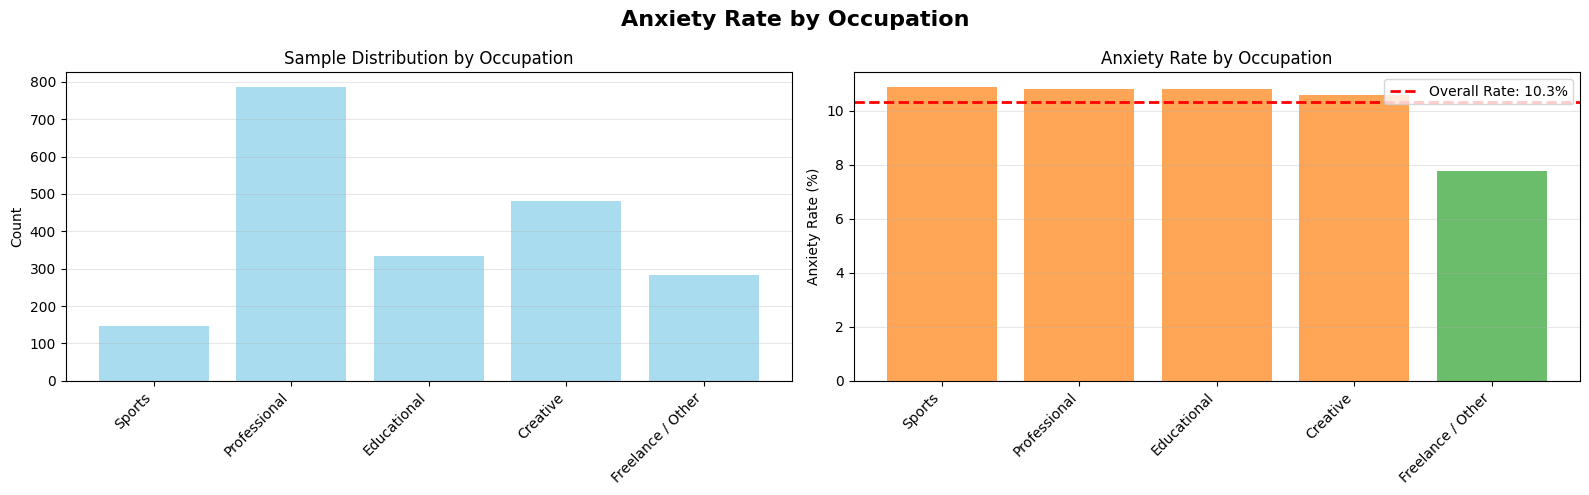

C:\Users\arwin\AppData\Local\Temp\ipykernel_8940\3468825414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_by_cat = data.groupby(category)['is_Anxious'].agg(['sum', 'count'])


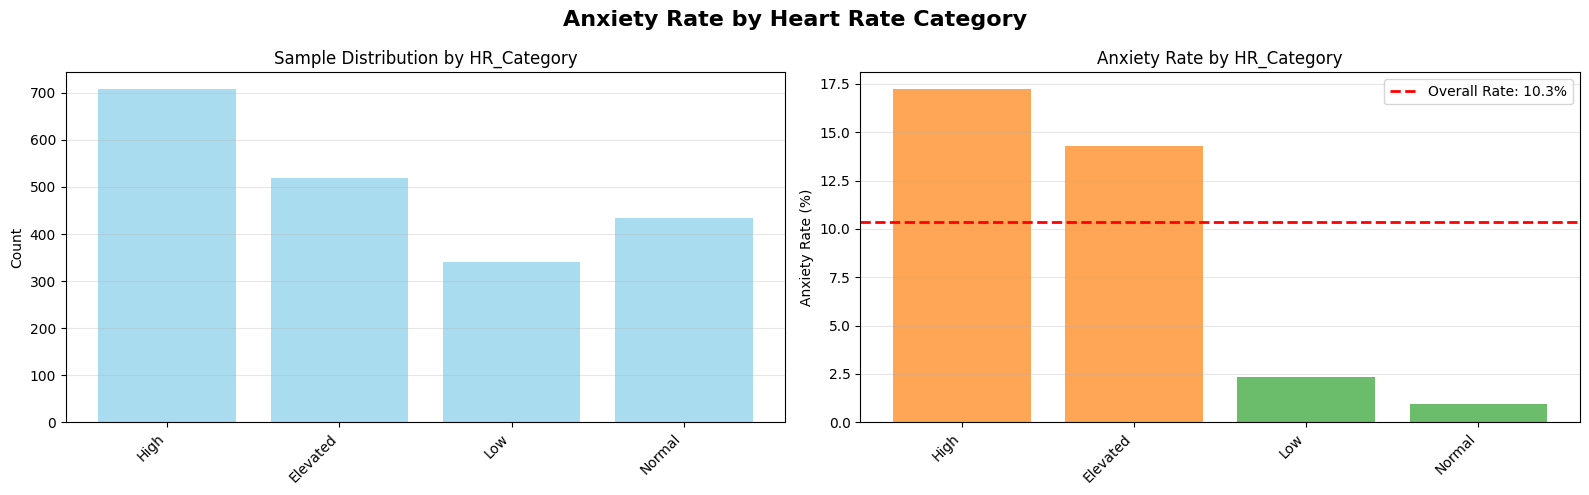

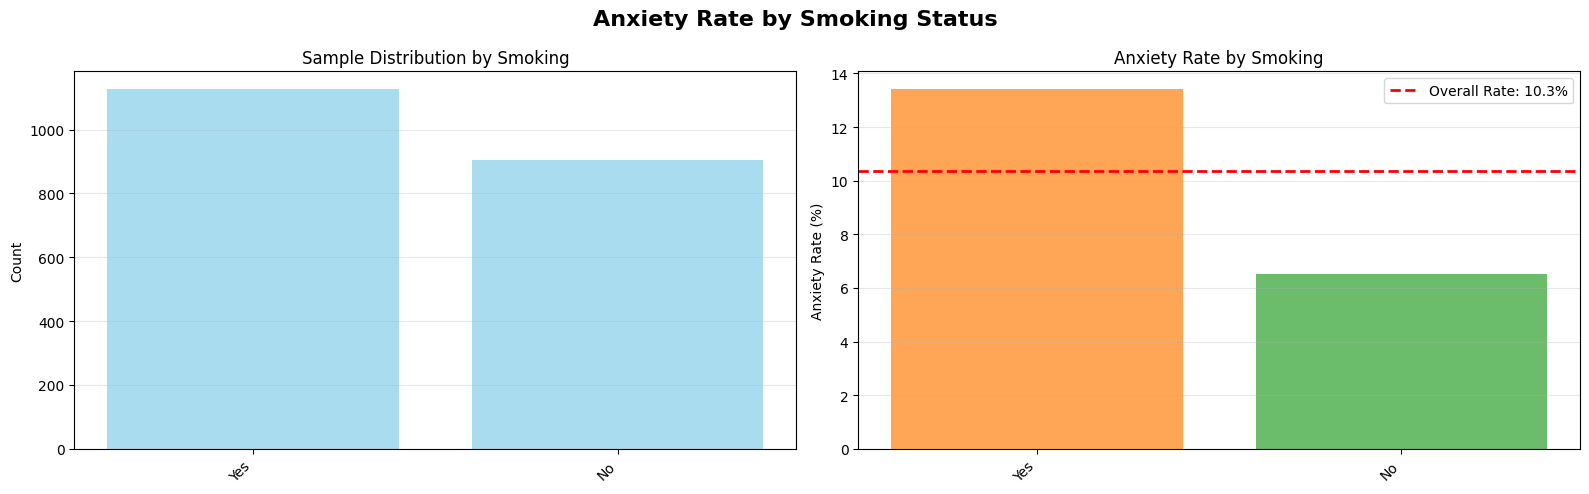

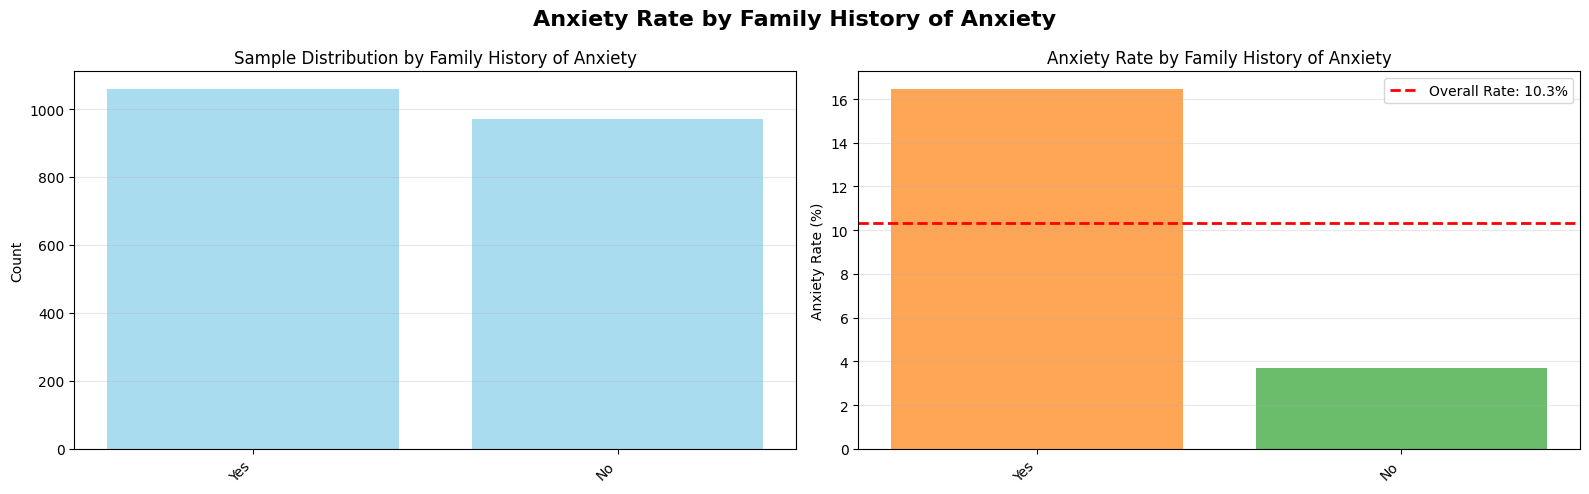

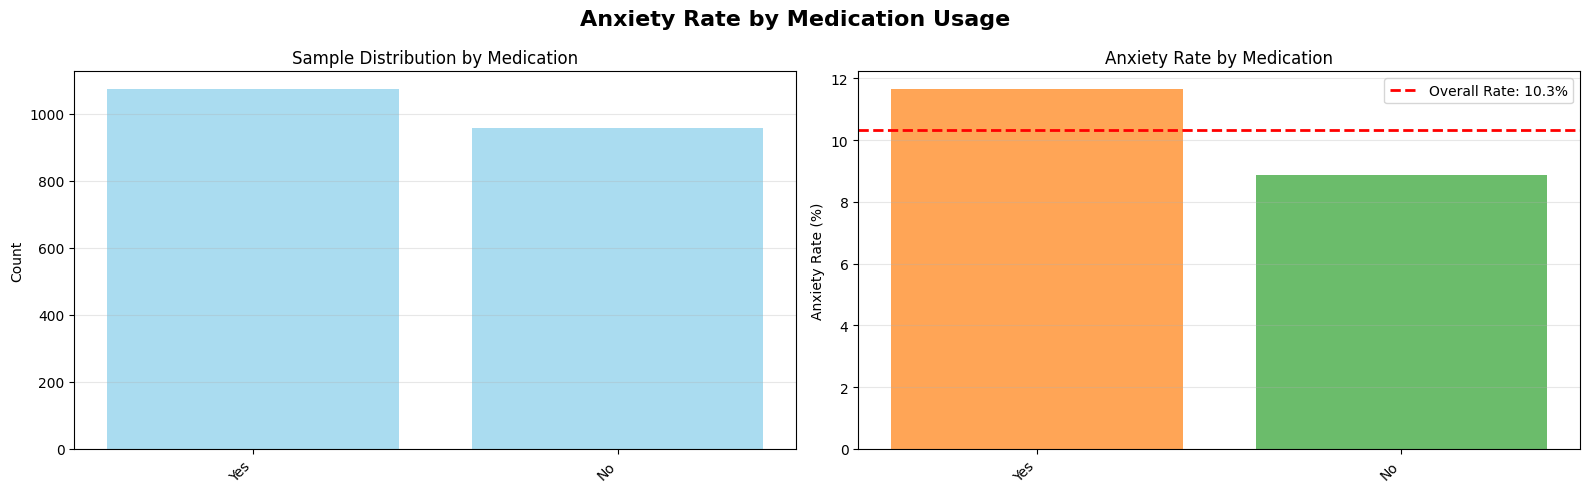

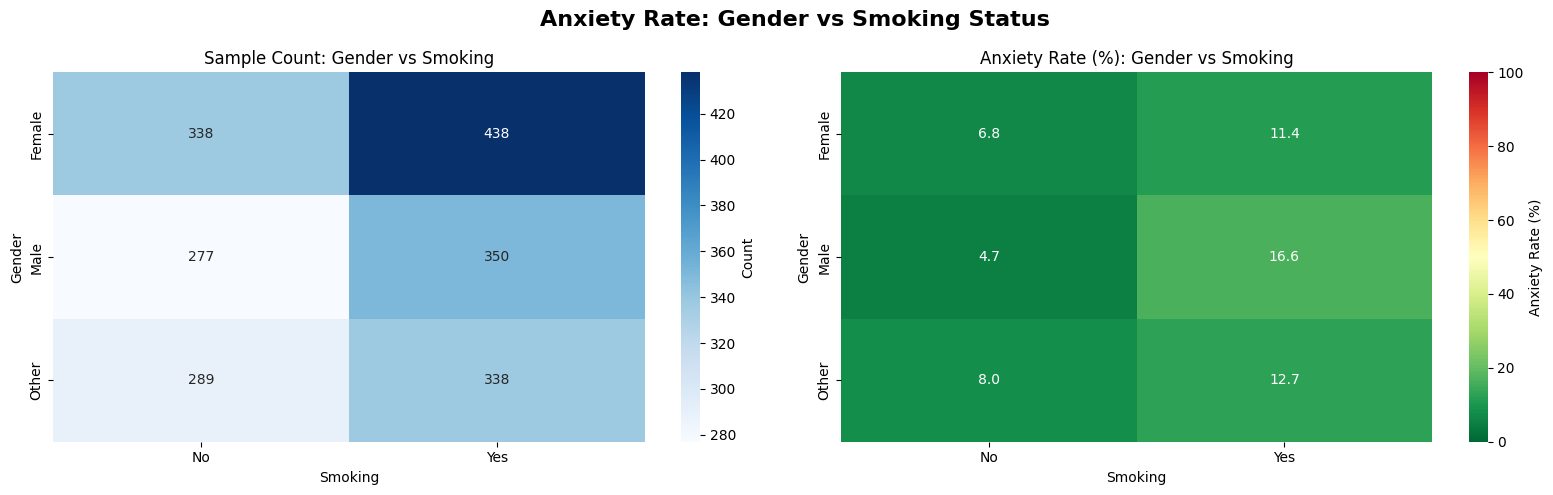

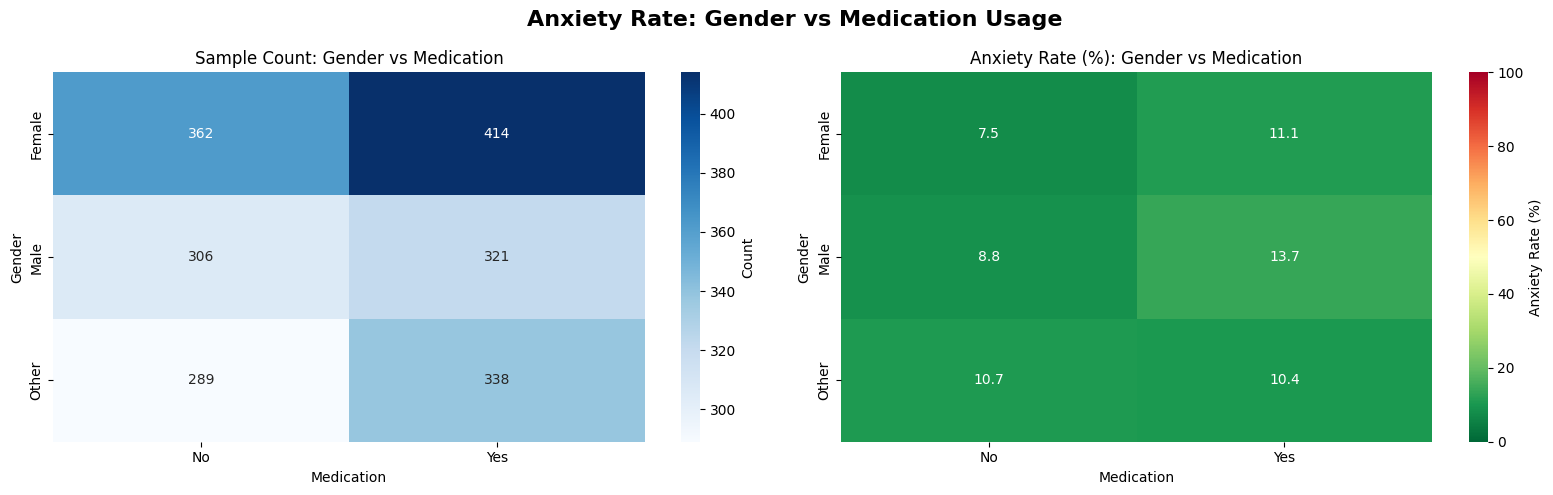

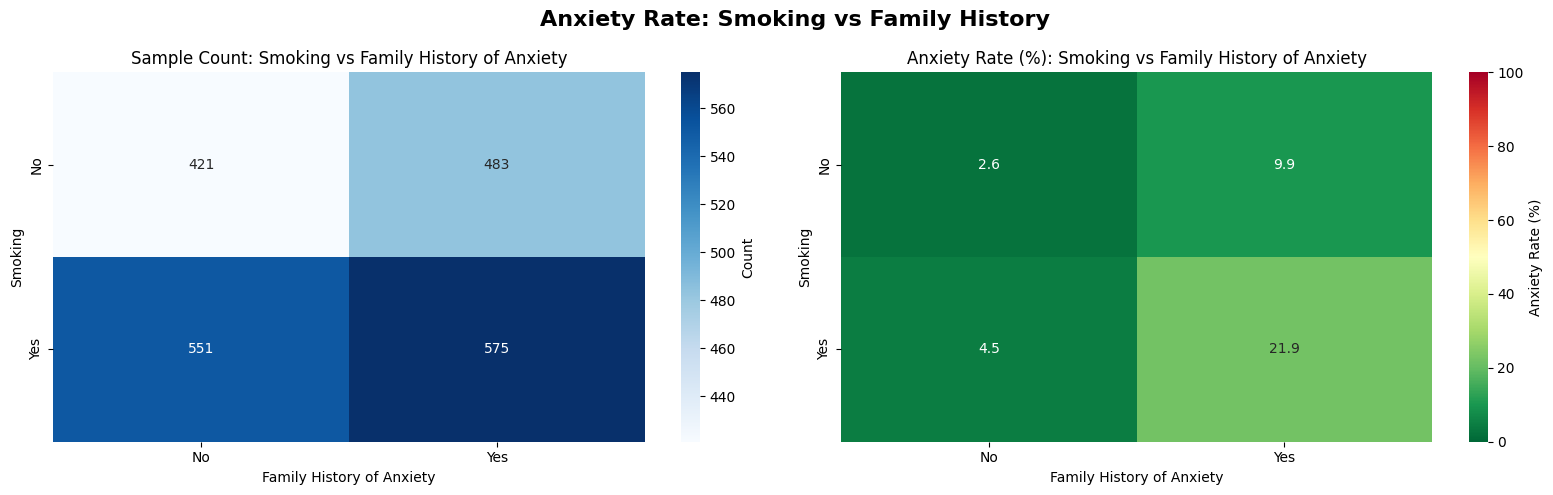

In [162]:

# ============================================================================
# KPI Visualization Functions
# ============================================================================

def plot_anxiety_rate_by_category(data, category, title):
    """
    Plot anxiety rate by category
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    # Calculate anxiety rates
    anxiety_by_cat = data.groupby(category)['is_Anxious'].agg(['sum', 'count'])
    anxiety_by_cat['rate'] = (anxiety_by_cat['sum'] / anxiety_by_cat['count'] * 100)
    anxiety_by_cat = anxiety_by_cat.sort_values('rate', ascending=False)
    
    # Plot 1: Count Bar Chart
    x_pos = range(len(anxiety_by_cat))
    axes[0].bar(x_pos, anxiety_by_cat['count'], color='skyblue', alpha=0.7, label='Total Count')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(anxiety_by_cat.index, rotation=45, ha='right')
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Sample Distribution by {category}')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Plot 2: Anxiety Rate Bar Chart
    colors = ['#ff7f0e' if x > anxiety_rate else '#2ca02c' for x in anxiety_by_cat['rate']]
    axes[1].bar(x_pos, anxiety_by_cat['rate'], color=colors, alpha=0.7)
    axes[1].axhline(y=anxiety_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Rate: {anxiety_rate:.1f}%')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(anxiety_by_cat.index, rotation=45, ha='right')
    axes[1].set_ylabel('Anxiety Rate (%)')
    axes[1].set_title(f'Anxiety Rate by {category}')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return anxiety_by_cat


def plot_heatmap_anxiety_cross(data, col1, col2, title):
    """
    Plot anxiety rate as heatmap for two categories
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(data[col1], data[col2], data['is_Anxious'], aggfunc='sum')
    cross_count = pd.crosstab(data[col1], data[col2])
    cross_rate = (cross_tab / cross_count * 100).fillna(0)
    
    # Plot 1: Count heatmap
    sns.heatmap(cross_count, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_title(f'Sample Count: {col1} vs {col2}')
    
    # Plot 2: Anxiety rate heatmap
    sns.heatmap(cross_rate, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=axes[1], cbar_kws={'label': 'Anxiety Rate (%)'}, vmin=0, vmax=100)
    axes[1].set_title(f'Anxiety Rate (%): {col1} vs {col2}')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# Generate KPI Visualizations
# ============================================================================

print("\n" + "="*80)
print("ANXIETY RATE VISUALIZATIONS")
print("="*80 + "\n")

# KPI 1: Anxiety Rate by Gender
plot_anxiety_rate_by_category(df, 'Gender', 'Anxiety Rate by Gender')

# KPI 2: Anxiety Rate by Occupation
plot_anxiety_rate_by_category(df, 'Occupation', 'Anxiety Rate by Occupation')

# KPI 3: Anxiety Rate by Heart Rate Category
plot_anxiety_rate_by_category(df, 'HR_Category', 'Anxiety Rate by Heart Rate Category')

# KPI 4: Anxiety Rate by Smoking Status
plot_anxiety_rate_by_category(df, 'Smoking', 'Anxiety Rate by Smoking Status')

# KPI 5: Anxiety Rate by Family History
plot_anxiety_rate_by_category(df, 'Family History of Anxiety', 'Anxiety Rate by Family History of Anxiety')

# KPI 6: Anxiety Rate by Medication
plot_anxiety_rate_by_category(df, 'Medication', 'Anxiety Rate by Medication Usage')

# KPI 7: Cross-tabulation Heatmaps
plot_heatmap_anxiety_cross(df, 'Gender', 'Smoking', 'Anxiety Rate: Gender vs Smoking Status')
plot_heatmap_anxiety_cross(df, 'Gender', 'Medication', 'Anxiety Rate: Gender vs Medication Usage')
plot_heatmap_anxiety_cross(df, 'Smoking', 'Family History of Anxiety', 'Anxiety Rate: Smoking vs Family History')